<table class="table table-bordered">
    <tr>
        <th style="width:250px"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 100%; height: 125px; "></th>
        <th style="text-align:center;"><h1>Data Wrangling</h1><h2>Assignment 2 </h2><h3>Diploma in Data Science</h3></th>
    </tr>
</table>

## <u>Table Of Contents:</u>

####  [Step 1: Load and Explore the Data](#part1)

   - 1.1: [Introduction & Problem Statement Proposition](#part1.1)
   
   
   - 1.2: [Formulation of Prediction Problem](#part1.2)
   
   
   - 1.3: [Exploring and Identifying Useful Information](#part1.3)

####  [Step 2: Data Wrangling on Multiple Tables](#part2)

   - 2.1: [Subsetting, Grouping, and Filtering Tables](#part2.1)
   
   
   - 2.2: [Concatenation, Merging, and Joining Tables](#part2.2)
   
   
   - 2.3: [Creation of New Features](#part2.3)
   
####  [Step 3: Data Cleansing and Transformation](#part3)

   - 3.1: [Missing Value Imputation](#part3.1)
   
   
   - 3.2: [Detecting and Handling Outliers](#part3.2)
   
   
   - 3.3: [Train-Test Split](#part3.3)
   
   
   - 3.4: [Categorical Data Encoding](#part3.4)
   
   
   - 3.5: [Numerical Data Transformation](#part3.5)
   
   
   - 3.6: [Variable Binning/Discretization](#part3.6)
   
   
   - 3.7: [Feature Scaling](#part3.7)
   
   
   - 3.8: [Applying Mathematical Calculations To Features](#part3.8)
   
####  [Step 4: Machine Learning Modelling](#part4)

   
####  [Step 5: Summary & Further Improvements](#part5)


### Note: Report is Done Throughout The Notebook

In [1]:
# import the packages

##### BASIC #####
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta
from warnings import simplefilter
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)

##### GRAPHICAL #####
import matplotlib.pyplot as plt
import seaborn as sns


##### Q-Q PLOTS #####
import scipy.stats as stats


##### IMPUTATION #####
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

import feature_engine.imputation as mdi
from feature_engine.imputation import MeanMedianImputer
from feature_engine.imputation import ArbitraryNumberImputer
from feature_engine.imputation import CategoricalImputer
from feature_engine.imputation import EndTailImputer
from feature_engine.imputation import RandomSampleImputer
from feature_engine.imputation import AddMissingIndicator


##### ENCODING (CATEGORICAL TO NUMERICAL) #####
from sklearn.preprocessing import OrdinalEncoder

from feature_engine.encoding import OneHotEncoder
from feature_engine.encoding import OrdinalEncoder
from feature_engine.encoding import CountFrequencyEncoder
from feature_engine.encoding import MeanEncoder
from feature_engine.encoding import RareLabelEncoder


##### MATHEMATICAL TRANSFORMATION #####
from sklearn.preprocessing import FunctionTransformer

from feature_engine.transformation import ReciprocalTransformer
from feature_engine.transformation import LogTransformer
from feature_engine.transformation import PowerTransformer
from feature_engine.transformation import BoxCoxTransformer
from feature_engine.transformation import YeoJohnsonTransformer


##### DISCRETISATION (NUMERICAL INTO GROUPS) #####
from sklearn.preprocessing import KBinsDiscretizer

from feature_engine.discretisation import EqualWidthDiscretiser
from feature_engine.discretisation import EqualFrequencyDiscretiser


##### FEATURE ENGINEERING #####
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler, StandardScaler
from sklearn.preprocessing import RobustScaler


##### ADDING NEW FEATURES #####
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA


##### TESTS #####
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# <u>Step 1: Load and Explore the Data</u> <a id="part1"></a>

## <u>1.1. Introduction & Problem Statement Proposition</u> <a id="part1.1"></a>

<u>**Introduction**</u>

Formula 1 is one of the most recognisable racing events currently, spurring both the feeling of excitement when teams performs excellently, and disappointment when teams performs poorly.

Generally, teams constantly seek ways to optimise their strategies, improve their performance, ultimately aiming to emerge victorious in races. This is especially true for racing teams who has consistently performed poorly throughout the various races, and are in a constant sought for data-driven improvements. To achieve this goal, data-driven decision making manifests its importance. Therefore,  with the provided F1 dataset, this project ultimately aims to create a predictive model, extracting valuable insights that would benefit F1 racing teams by giving them a competitive edge.

The Formula 1 dataset consists of multiple tables, including the constructors, results, circuits, races, drivers, and many more. In each table, it provides enriching and discreet details of the variables, allowing us to identify possible useful features that allow us to kickstart this project.

<u>**Value-Based Problem Statement**</u>

In the F1 industry, data is being constantly collected, capturing a myriad of variables such as historical race results, driver characteristics, circuit locations, and more. The primary challenge here lies within uncovering this dataset with multiple tables to extract valuable insights that can allow F1 teams to drive improvements and call upon strategic decisions. Hence, there are various problem statements that can be formulated, and each problem would have different modelling approaches to resolve these issues. These problems can include:

**Race Outcome:** By analysing historical data on driver's performance, vehicle constructor, different race events and other variables, the model should be able to make accurate predictions on which factors contribute to a successful/victorious race

**Race Team Performance Optimisation:** The predictive model for this problem aims to predict how the racer will performs during different settings, such as knowing how different driver nationalities or constructor nationalities affect the race performances. By analysing and creating a predictive model to predict the driver's performance, this will allow F1 teams to conduct strategic preparations and optimisations before the upcoming race to ensure that the F1 team will perform at its best, clinching closer to victory.

These are merely a few out of many problems that can be formulated based on the F1 dataset. Overall, this project aims to develop a predictive model that can improve team strategies, drive improvement and optimisation, and enhance the overall quality of F1 racing, In this project, we will be focusing more on how we can aid F1 teams to achieve performance optimisation, providing them with accurate and meaningful insights through our predictive model. This would ultimately allow them to make more strategic decisions to enhance their performance, giving them a competitive advantage.

## <u>1.2. Formulation of Prediction Problem</u> <a id="part1.2"></a>

<u>**Prediction Problem**</u>

In the early stages of identifying an appropriate and meaningful prediction problem, exploring the various tables in the F1 Dataset and recognising how each tables are correlated with each other through primary and foreign keys was an integral part of this process.

During this stage, I decided to make use of PowerBI's model view to gain a visual overview of how the various tables are correlated with each other. The screenshot below shows a sample of how most of the tables are linked with one another based on different keys. During this process, I was able to identify the primary fact table, which was the results_mod table from the various foreign keys it contained, and proceeded to explore the contents of the table to identify suitable variables for appropriate target variables.

After exploring the variables, I have concluded and decided on the prediction problem.

**Prediction Problem:** _Create a Linear Regression Model to Predict Fastest Lap Time_

**Rationale Behind Prediction Problem:** _Predicting the fastest lap time possessed extreme importance, allowing teams to optimises their strategies and seek enhanced performance. By predicting fastest lap times, teams can make more informed decisions regarding driver and vehicle adjustments, meticulous planning of appropriate race timings to optimise resources, and on-premise race strategies to ensure higher chances of victory. Ultimately, making accurate predictions on fastest lap time enables teams to adjust their strategic approach based on different factors, potentially improving race outcomes. Therefore, the ability to forecast the fastest lap time give teams the opportunity to  consume their resources efficiently, minimising time wastage, leading to higher probabilities of victory._

<u>**Suitable Tables**</u>

With the myriad of tables within the F1 dataset, extracting more features from the different tables would be useful in discovering more relationships and patterns to improve the model performance. Hence, after looking through the various features of each different table, I have evaluated and decided on tables utilised to extract variables from:

**Circuits** - Circuit Name

**Constructors** - Constructor Nationality

**Drivers** - Driver's Date of Birth and Nationality

**Races** - Race Date and Round

**Results** - Fastest Lap, Fastest Timing, and other variables

**Seasons** - Season Year, but can be derived with the Year of the Race Date

I felt that these features will be useful in identifying patterns and correlations with the target variable. For example, the different months and days of races can affect the Fastest Lap Time. Hence, these carefully selected variables from different tables may allow new patterns and correlations to emerge between the variables and the target, potentially improving the power of my regression model. Hence, I proceeded to perform some filtering of my data before merging these features together.

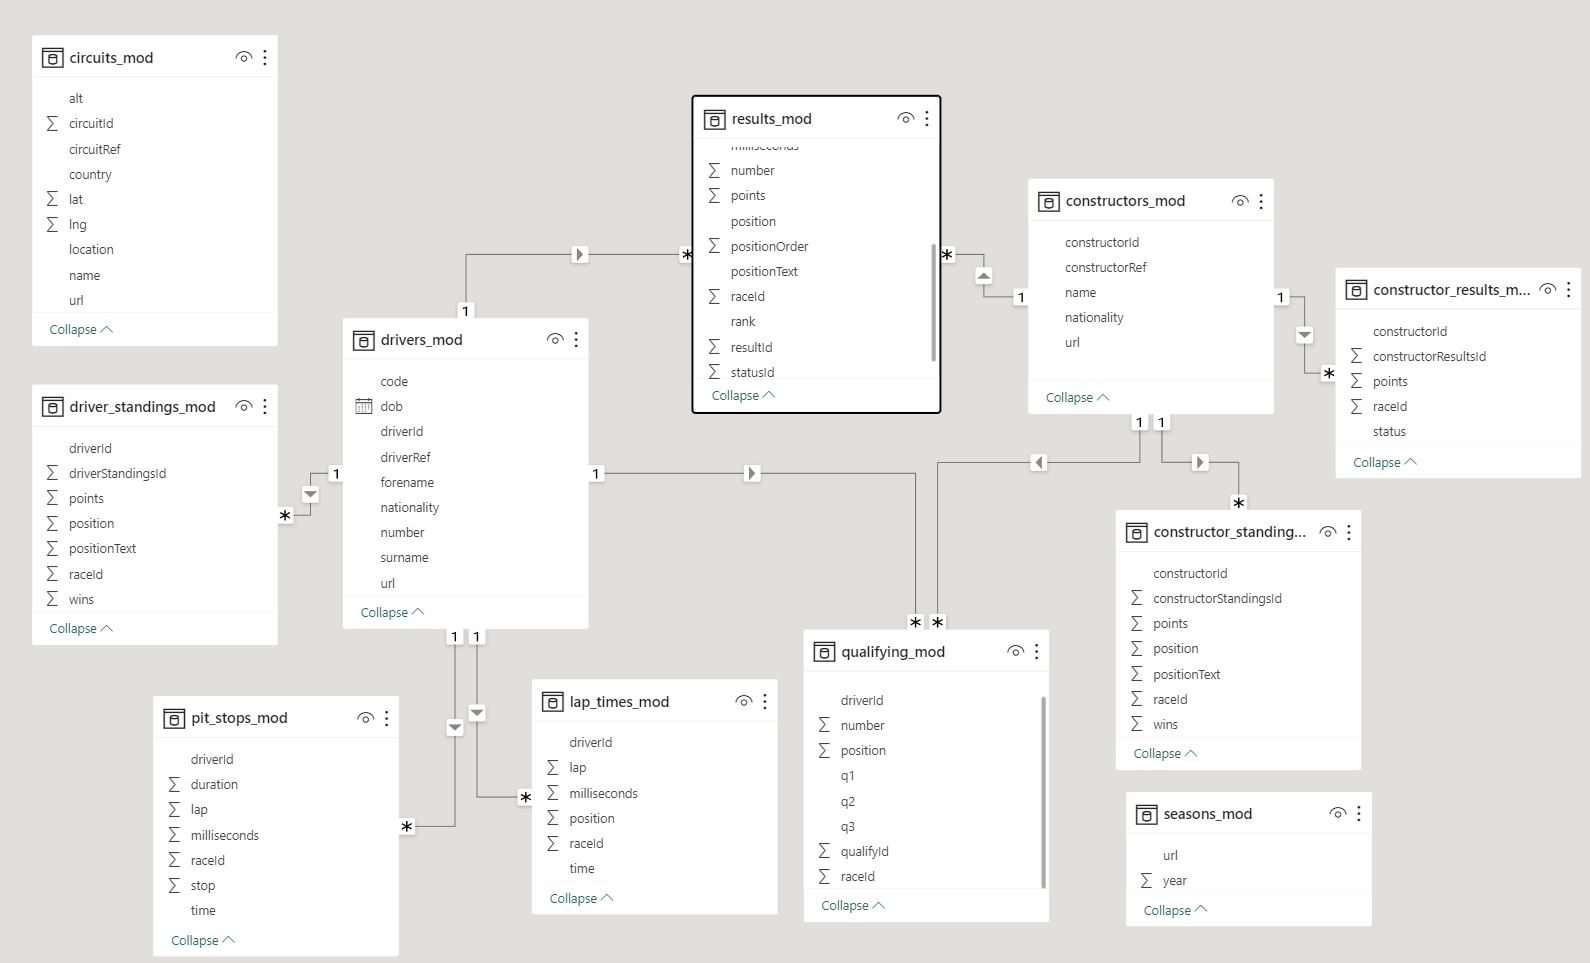

## <u>1.3. Exploring and Identifying Useful Information</u> <a id="part1.3"></a>

### Circuits Data

In [2]:
circuits_data = pd.read_csv("./datasets/f1db_csv_mod/circuits_mod.csv")
circuits_data.head()

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park


### Constructors Data

In [3]:
constructor_data = pd.read_csv("./datasets/f1db_csv_mod/constructors_mod.csv")
constructor_data.head()

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


### Constructor Results Data

In [4]:
constructor_results_data = pd.read_csv("./datasets/f1db_csv_mod/constructor_results_mod.csv")
constructor_results_data.head()

,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,\N
1,2,18,2,8.0,\N
2,3,18,3,9.0,\N
3,4,18,4,5.0,\N
4,5,18,5,2.0,\N


### Constructor Standings Data

In [5]:
constructor_standings_data = pd.read_csv("./datasets/f1db_csv_mod/constructor_standings_mod.csv")
constructor_standings_data.head()

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0
3,4,18,4,5.0,4,4,0
4,5,18,5,2.0,5,5,0


### Driver Standings Data

In [6]:
driver_standings_data = pd.read_csv("./datasets/f1db_csv_mod/driver_standings_mod.csv")
driver_standings_data.head()

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10,1,1,1
1,2,18,2,8,2,2,0
2,3,18,3,6,3,3,0
3,4,18,4,5,4,4,0
4,5,18,5,4,5,5,0


### Drivers Data

In [7]:
drivers_data = pd.read_csv("./datasets/f1db_csv_mod/drivers_mod.csv")
drivers_data.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


### Lap Times Data

In [8]:
lap_times_data = pd.read_csv("./datasets/f1db_csv_mod/lap_times_mod.csv")
lap_times_data.head()

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342


### Pit Stops Data

In [9]:
pit_stops_data = pd.read_csv("./datasets/f1db_csv_mod/pit_stops_mod.csv")
pit_stops_data.head()

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842


### Qualifying Data

In [10]:
qualifying_data = pd.read_csv("./datasets/f1db_csv_mod/qualifying_mod.csv")
qualifying_data.head()

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236


### Races Data

In [11]:
races_data = pd.read_csv("./datasets/f1db_csv_mod/races_mod.csv")
races_data.head()

,raceId,round,circuitId,name,date,time,url
0,1,1,1,Australian Grand Prix,3/29/2009,6:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2,2,Malaysian Grand Prix,4/5/12009,9:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,3,17,Chinese Grand Prix,4/19/2009,7:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,4,3,Bahrain Grand Prix,4/26/2009,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,5,4,Spanish Grand Prix,5/10/2009,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...


### Results Data

In [12]:
results_data = pd.read_csv("./datasets/f1db_csv_mod/results_mod.csv")
results_data.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,34:50.6,5690616,39,2,01:27.5,218.3,1
1,2,18,2,2,3,5,2,2,2,8.0,58,5.478,5696094,41,3,01:27.7,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,8.163,5698779,41,5,01:28.1,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,17.181,5707797,58,7,01:28.6,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,18.014,5708630,43,1,01:27.4,218.385,1


### Seasons Data

In [13]:
seasons_data = pd.read_csv("./datasets/f1db_csv_mod/seasons_mod.csv")
seasons_data.head()

,year,url
0,2009,https://en.wikipedia.org/wiki/2009_Formula_One...
1,2008,https://en.wikipedia.org/wiki/2008_Formula_One...
2,2007,https://en.wikipedia.org/wiki/2007_Formula_One...
3,2006,https://en.wikipedia.org/wiki/2006_Formula_One...
4,2005,https://en.wikipedia.org/wiki/2005_Formula_One...


### Status Data

In [14]:
status_data = pd.read_csv("./datasets/f1db_csv_mod/status_mod.csv")
status_data.head()

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine


# Step 2: Data Wrangling on Multiple Tables <a id="part2"></a>

**<u>Subsetting, Grouping & Filtering Tables</u>**

During this process, I have selected different tables to extract the necessary features to include in my fact table, the Results table. However, during this process, I have also decided to perform missing values imputation on the tables before merging, because by merging tables with missing values, it will introduce more missing values in the fact table, which may cause unwanted skewing if imputation is performed later. **(Example: There are 2 missing values in the altitude column in circuits. If no imputation is done and the tables are combined, the combined table will have multiple missing values for the altitude column)**. The imputation was done by using the wikipedia url in the table, shown in steps below.

Besides this, after performing some exploration of the unique values of each column for each table I selected to extract features from, I realised that there were some errors in the values of certain tables, such as Races Table having incorrect dates, and Results Table having incorrect Position Orders. This ensures that the errors are not being carried over and increased when the tables are combined. **(Example: Races Table has 8 incorrect date inputs for RaceDate. If it is merged with the fact table without being corrected, the number of incorrect date inputs in the RaceDate will be increased drastically)**


**<u>Concatenate, Merge, or Join Tables </u>**

There are 3 primary ways to combine tables together: Concatenation, Merging, and Joining. Out of the different methods, I decided to use the merge method. This is due to the importance in ensuring that the new features that are added into the fact table are correctly matched with the added features. 

For example, the fact table, Results, has a StatusID foreign key. And there is a Status Table, with StatusID being the primary key. By making use of the merge method and configuring it to execute an inner merge, this ensures that the StatusID in the Status Table matches the one in the Results Table. Ultimately, by using the merge method, this ensures that the tables are combined together accurately.

**<u>Extract & Create New Features</u>**

Creating new features within provided data allows new possible patterns and correlations to emerge between these new features and the target variable, overall allowing the overall model performance to be improved. Hence, it is important to extract new features from our various tables

As I had extract the DriverDOB and RaceDate, I decided to create new features with these 2 datetime columns, extracting new features. These features include: DriverDOB Day, DriverDOB Month, DriverDOB Year, RaceDate Quarter, RaceDate Month, RaceDate Day. After extracting these new features, I proceeded to drop the 2 datetime columns since it was no longer relevent and will not be used in my linear regression modelling later on.

## <u>2.1. Subsetting, Grouping, and Filtering Tables</u> <a id="part2.1"></a>

### <u>Circuits Table</u>

### Filtering the Table

In [15]:
# Filtering Required Data from Circuits Table

circuits_data_required = circuits_data[['circuitId','name']].copy()
circuits_data_required.rename(columns={'name': 'CircuitName'},inplace=True)

# Validating Required Data from Circuits Table

circuits_data_required.replace(r'\\N', np.nan, regex=True, inplace=True)
circuits_data_required.isnull().sum()

circuitId      0
CircuitName    0
dtype: int64

### <u>Constructors Table<u/>

### Filtering the Table

In [16]:
# Filtering Required Data from Constructor Table

constructor_data_required = constructor_data[['constructorId','name','nationality']].copy()
constructor_data_required.rename(columns={'name': 'ConstructorName', 'nationality': 'ConstructorNationality'}, inplace=True)

# Validating Required Data from Constructor Table

constructor_data_required.replace(r'\\N', np.nan, regex=True, inplace=True)
constructor_data_required.isnull().sum()

constructorId             0
ConstructorName           0
ConstructorNationality    0
dtype: int64

In [17]:
constructor_data_required

,constructorId,ConstructorName,ConstructorNationality
0,1,McLaren,British
1,2,BMW Sauber,German
2,3,Williams,British
3,4,Renault,French
4,5,Toro Rosso,Italian
...,...,...,...
206,209,Manor Marussia,British
207,210,Haas F1 Team,American
208,211,Racing Point,British
209,213,AlphaTauri,Italian


### <u>Drivers Table<u/>

### Filtering the Table

In [18]:
# Filtering Required Data from Drivers Table

drivers_data_required = drivers_data[['driverId','dob','nationality']].copy()
drivers_data_required.rename(columns={'dob': 'DriverDOB', 'nationality': 'DriverNationality'}, inplace=True)

# Validating Required Data from Constructor Table

drivers_data_required.replace(r'\\N', np.nan, regex=True, inplace=True)
drivers_data_required.isnull().sum()

driverId             0
DriverDOB            0
DriverNationality    0
dtype: int64

In [19]:
drivers_data_required

,driverId,DriverDOB,DriverNationality
0,1,1985-01-07,British
1,2,1977-05-10,German
2,3,1985-06-27,German
3,4,1981-07-29,Spanish
4,5,1981-10-19,Finnish
...,...,...,...
849,851,1995-09-23,British
850,852,2000-05-11,Japanese
851,853,1999-03-02,Russian
852,854,1999-03-22,German


### <u>Races Table<u/>

### Filtering the Table

In [20]:
# Filtering Required Data from Drivers Table

races_data_required = races_data[['raceId','round','circuitId','date','name']].copy()
races_data_required.rename(columns={'round': 'Round', 'date': 'RaceDate','name':'RaceName'}, inplace=True)

# Validating Required Data from Constructor Table

races_data_required.replace(r'\\N', np.nan, regex=True, inplace=True)
races_data_required.isnull().sum()

raceId        0
Round         0
circuitId     0
RaceDate     10
RaceName      0
dtype: int64

### Race Table Missing Value Imputation

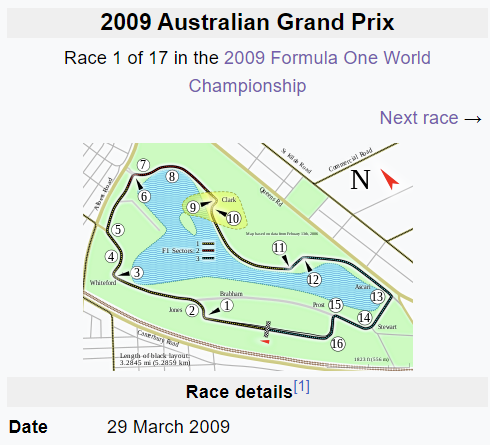

In [21]:
races_data_required.iloc[0]

raceId                           1
Round                            1
circuitId                        1
RaceDate                 3/29/2009
RaceName     Australian Grand Prix
Name: 0, dtype: object

In [22]:
# Find rows with NaN Dates

nan_rows = races_data_required[races_data_required['RaceDate'].isna()]
print(nan_rows)

      raceId  Round  circuitId RaceDate                  RaceName
26        27     10         10      NaN         German Grand Prix
68        69     17         22      NaN       Japanese Grand Prix
104      105     16         17      NaN        Chinese Grand Prix
897      900      1          1      NaN     Australian Grand Prix
914      917     18         18      NaN      Brazilian Grand Prix
935      948      1          1      NaN     Australian Grand Prix
948      961     14         14      NaN        Italian Grand Prix
978      991      3         17      NaN        Chinese Grand Prix
1015    1028     19         69      NaN  United States Grand Prix
1047    1062     11         11      NaN      Hungarian Grand Prix


In [23]:
races_data_required.loc[26, 'RaceDate'] = "7/20/2008"
races_data_required.loc[68, 'RaceDate'] = "10/8/2006"
races_data_required.loc[104, 'RaceDate'] = "9/26/2004"
races_data_required.loc[897, 'RaceDate'] = "3/16/2014"
races_data_required.loc[914, 'RaceDate'] = "11/9/2014"
races_data_required.loc[935, 'RaceDate'] = "3/20/2016"
races_data_required.loc[948, 'RaceDate'] = "9/4/2016"
races_data_required.loc[978, 'RaceDate'] = "4/15/2018"
races_data_required.loc[1015, 'RaceDate'] = "11/3/2019"
races_data_required.loc[1047, 'RaceDate'] = "8/1/2021"

In [24]:
races_data_required.isnull().sum()

raceId       0
Round        0
circuitId    0
RaceDate     0
RaceName     0
dtype: int64

### Races Table Errors

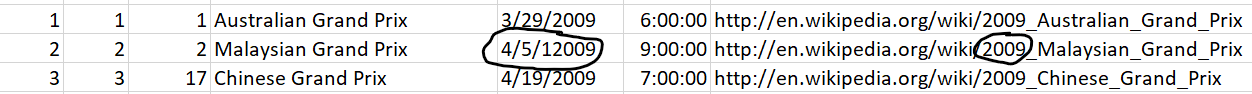

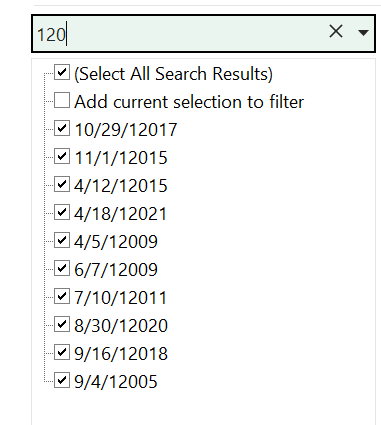

Due to this error, when converting to a datetime format, a parse error is raised. Hence, it is a good practice to replace this with the appropriate year before merging the tables

In [25]:
# Replacing incorrect date inputs

races_data_required.replace("4/5/12009", "4/5/2009", inplace=True)
races_data_required.replace("4/12/12015", "4/12/2015", inplace=True)
races_data_required.replace("4/18/12021", "4/18/2021", inplace=True)

races_data_required.replace("6/7/12009", "6/7/2009", inplace=True)

races_data_required.replace("7/10/12011", "7/10/2011", inplace=True)

races_data_required.replace("8/30/12020", "8/30/2020", inplace=True)

races_data_required.replace("9/16/12018", "9/16/2018", inplace=True)
races_data_required.replace("9/4/12005", "9/4/2005", inplace=True)

races_data_required.replace("10/29/12017", "10/29/2017", inplace=True)

races_data_required.replace("11/1/12015", "11/1/2015", inplace=True)

### <u>Results Table<u/>

### Filtering the Table

In [26]:
results_data.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,34:50.6,5690616,39,2,01:27.5,218.3,1
1,2,18,2,2,3,5,2,2,2,8.0,58,5.478,5696094,41,3,01:27.7,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,8.163,5698779,41,5,01:28.1,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,17.181,5707797,58,7,01:28.6,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,18.014,5708630,43,1,01:27.4,218.385,1


In [27]:
# Filtering Required Data from Results Table

results_data_required = results_data[['resultId','raceId','driverId','constructorId','grid','positionOrder','points','laps'
                                      ,'milliseconds','fastestLap','fastestLapTime','statusId']].copy()

In [28]:
results_data_required.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25399 entries, 0 to 25398
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   resultId        25399 non-null  int64  
 1   raceId          25399 non-null  int64  
 2   driverId        25399 non-null  int64  
 3   constructorId   25399 non-null  int64  
 4   grid            25399 non-null  int64  
 5   positionOrder   25399 non-null  int64  
 6   points          25399 non-null  float64
 7   laps            25399 non-null  int64  
 8   milliseconds    25399 non-null  object 
 9   fastestLap      25399 non-null  object 
 10  fastestLapTime  25399 non-null  object 
 11  statusId        25399 non-null  int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 2.3+ MB


### Results Table Errors

Replace 99 with 1. shows tthat this is a misinput of data

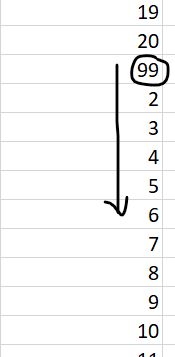

In [29]:
results_data_required['positionOrder'].replace(99, 1, inplace=True)

## <u>2.2. Concatenation, Merging, and Joining Tables</u> <a id="part2.2"></a>

In [30]:
# Fact Table

results_data_required

# Results and Status Table

new_data_1 = pd.merge(results_data_required,status_data,on='statusId',how='inner').drop_duplicates()

# Results and Drivers Table

new_data_2 = pd.merge(new_data_1,drivers_data_required,on='driverId',how='inner').drop_duplicates()

# Results and Constructors Table

new_data_3 = pd.merge(new_data_2,constructor_data_required,on='constructorId',how='inner').drop_duplicates()

# Results and Race Table

new_data_4 = pd.merge(new_data_3,races_data_required,on='raceId',how='inner').drop_duplicates()

# Results and Circuits Table
new_data_5 = pd.merge(new_data_4,circuits_data_required,on='circuitId',how='inner').drop_duplicates()
new_data_5 = new_data_5.sort_values(by='resultId')

# After-Merging Dataset. There were some errors regarding the indexing. Hence, had to replace the resultId to the correct one by
# referrencing to the Excel SpreadSheet

df = new_data_5.reset_index()

df.loc[1, 'resultId'] = 99
df= df.sort_values(by='resultId')

df.head()

,index,resultId,raceId,driverId,constructorId,grid,positionOrder,points,laps,milliseconds,...,status,DriverDOB,DriverNationality,ConstructorName,ConstructorNationality,Round,circuitId,RaceDate,RaceName,CircuitName
0,0,1,18,1,1,1,1,10.0,58,5690616,...,Finished,1985-01-07,British,McLaren,British,1,1,3/16/2008,Australian Grand Prix,Albert Park Grand Prix Circuit
2,4,3,18,3,3,7,3,6.0,58,5698779,...,Finished,1985-06-27,German,Williams,British,1,1,3/16/2008,Australian Grand Prix,Albert Park Grand Prix Circuit
3,6,4,18,4,4,11,4,5.0,58,5707797,...,Finished,1981-07-29,Spanish,Renault,French,1,1,3/16/2008,Australian Grand Prix,Albert Park Grand Prix Circuit
4,1,5,18,5,1,3,5,4.0,58,5708630,...,Finished,1981-10-19,Finnish,McLaren,British,1,1,3/16/2008,Australian Grand Prix,Albert Park Grand Prix Circuit
5,5,6,18,6,3,13,6,3.0,57,\N,...,+1 Lap,1985-01-11,Japanese,Williams,British,1,1,3/16/2008,Australian Grand Prix,Albert Park Grand Prix Circuit


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25399 entries, 0 to 25398
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   25399 non-null  int64  
 1   resultId                25399 non-null  int64  
 2   raceId                  25399 non-null  int64  
 3   driverId                25399 non-null  int64  
 4   constructorId           25399 non-null  int64  
 5   grid                    25399 non-null  int64  
 6   positionOrder           25399 non-null  int64  
 7   points                  25399 non-null  float64
 8   laps                    25399 non-null  int64  
 9   milliseconds            25399 non-null  object 
 10  fastestLap              25399 non-null  object 
 11  fastestLapTime          25399 non-null  object 
 12  statusId                25399 non-null  int64  
 13  status                  25399 non-null  object 
 14  DriverDOB               25399 non-null

In [32]:
# Drop Unnecessary Columns

df.drop(['index','resultId','raceId','statusId','circuitId','constructorId','driverId'], axis = 1, inplace = True)

In [33]:
df_filtered = df[df['laps'] != 0]
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22904 entries, 0 to 25398
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   grid                    22904 non-null  int64  
 1   positionOrder           22904 non-null  int64  
 2   points                  22904 non-null  float64
 3   laps                    22904 non-null  int64  
 4   milliseconds            22904 non-null  object 
 5   fastestLap              22904 non-null  object 
 6   fastestLapTime          22904 non-null  object 
 7   status                  22904 non-null  object 
 8   DriverDOB               22904 non-null  object 
 9   DriverNationality       22904 non-null  object 
 10  ConstructorName         22904 non-null  object 
 11  ConstructorNationality  22904 non-null  object 
 12  Round                   22904 non-null  int64  
 13  RaceDate                22904 non-null  object 
 14  RaceName                22904 non-null

In [34]:
# Filtering rows whereby all 5 columns contain '\N'

columns_to_check = ['milliseconds','fastestLap', 'fastestLapTime']
df_filtered = df_filtered[~df_filtered[columns_to_check].eq(r'\N').all(axis=1)]

In [35]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10355 entries, 0 to 25398
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   grid                    10355 non-null  int64  
 1   positionOrder           10355 non-null  int64  
 2   points                  10355 non-null  float64
 3   laps                    10355 non-null  int64  
 4   milliseconds            10355 non-null  object 
 5   fastestLap              10355 non-null  object 
 6   fastestLapTime          10355 non-null  object 
 7   status                  10355 non-null  object 
 8   DriverDOB               10355 non-null  object 
 9   DriverNationality       10355 non-null  object 
 10  ConstructorName         10355 non-null  object 
 11  ConstructorNationality  10355 non-null  object 
 12  Round                   10355 non-null  int64  
 13  RaceDate                10355 non-null  object 
 14  RaceName                10355 non-null

## <u>2.3. Creation of New Features</u> <a id="part2.3"></a>

In [36]:
df_filtered['RaceDate'] = pd.to_datetime(df_filtered['RaceDate'])
df_filtered['DriverDOB'] = pd.to_datetime(df_filtered['DriverDOB'])

In [37]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10355 entries, 0 to 25398
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   grid                    10355 non-null  int64         
 1   positionOrder           10355 non-null  int64         
 2   points                  10355 non-null  float64       
 3   laps                    10355 non-null  int64         
 4   milliseconds            10355 non-null  object        
 5   fastestLap              10355 non-null  object        
 6   fastestLapTime          10355 non-null  object        
 7   status                  10355 non-null  object        
 8   DriverDOB               10355 non-null  datetime64[ns]
 9   DriverNationality       10355 non-null  object        
 10  ConstructorName         10355 non-null  object        
 11  ConstructorNationality  10355 non-null  object        
 12  Round                   10355 non-null  int64 

In [38]:
# Creating New DateTime Features

df_additional = df_filtered.copy()

# DriverDOB

df_additional['DriverYearDOB'] = df_additional['DriverDOB'].dt.year
df_additional['DriverQuarterDOB'] = df_additional['DriverDOB'].dt.quarter
df_additional['DriverMonthDOB'] = df_additional['DriverDOB'].dt.month
df_additional['DriverDayDOB'] = df_additional['DriverDOB'].dt.day

# RaceDate

df_additional['RaceDateQuarter'] = df_additional['RaceDate'].dt.quarter
df_additional['RaceDateMonth'] = df_additional['RaceDate'].dt.month
df_additional['RaceDateDay'] = df_additional['RaceDate'].dt.day

# Remove the Date Columns

df_additional.drop(['DriverDOB','RaceDate'], axis = 1, inplace = True)

pd.options.display.max_columns = 30
df_additional

,grid,positionOrder,points,laps,milliseconds,fastestLap,fastestLapTime,status,DriverNationality,ConstructorName,ConstructorNationality,Round,RaceName,CircuitName,DriverYearDOB,DriverQuarterDOB,DriverMonthDOB,DriverDayDOB,RaceDateQuarter,RaceDateMonth,RaceDateDay
0,1,1,10.0,58,5690616,39,01:27.5,Finished,British,McLaren,British,1,Australian Grand Prix,Albert Park Grand Prix Circuit,1985,1,1,7,1,3,16
2,7,3,6.0,58,5698779,41,01:28.1,Finished,German,Williams,British,1,Australian Grand Prix,Albert Park Grand Prix Circuit,1985,2,6,27,1,3,16
3,11,4,5.0,58,5707797,58,01:28.6,Finished,Spanish,Renault,French,1,Australian Grand Prix,Albert Park Grand Prix Circuit,1981,3,7,29,1,3,16
4,3,5,4.0,58,5708630,43,01:27.4,Finished,Finnish,McLaren,British,1,Australian Grand Prix,Albert Park Grand Prix Circuit,1981,4,10,19,1,3,16
5,13,6,3.0,57,\N,50,01:29.6,+1 Lap,Japanese,Williams,British,1,Australian Grand Prix,Albert Park Grand Prix Circuit,1985,1,1,11,1,3,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25394,4,15,0.0,55,\N,51,01:26.4,Engine,Mexican,Red Bull,Austrian,22,Abu Dhabi Grand Prix,Yas Marina Circuit,1990,1,1,26,4,12,12
25395,16,16,0.0,50,\N,30,01:29.3,Accident,Canadian,Williams,British,22,Abu Dhabi Grand Prix,Yas Marina Circuit,1995,2,6,29,4,12,12
25396,14,17,0.0,33,\N,33,01:29.4,Gearbox,Italian,Alfa Romeo,Swiss,22,Abu Dhabi Grand Prix,Yas Marina Circuit,1993,4,12,14,4,12,12
25397,17,18,0.0,26,\N,23,01:30.6,Gearbox,British,Williams,British,22,Abu Dhabi Grand Prix,Yas Marina Circuit,1998,1,2,15,4,12,12


# Step 3: Data Cleansing and Transformation <a id="part3"></a>

**<u>Missing Value Imputation</u>**

**Fastest Lap Time:** I discovered that there was an extremely high percentage of missing values present in FastestLapTime. Hence, knowing that using conventional imputation methods such as Mean Imputation and Counts Frequency would be unreliable due to the extreme skewing it will cause, and Random Sample Imputation as it could distort the logic of my data **(top position drivers are more likely to have higher fastest lap time, observed from the dataframe)**, I decided to make use of the dataframe's milliseconds and laps **(milliseconds / laps)** to impute the fastest timing. This is a more reliable imputation method since different races may vary in their fastest lap times, hence it is important to keep to that structure.

**Fastest Lap:** Imputated by randomly selecting a number between 0 and number of laps the racer has completed. Using Mean and Counts Frequency Imputation can result in float values, which is inaccurate and illogical. Using Random Sample imputation may impute a fastest lap number higher than the number of laps the driver has done, causing illogical imputation. Lastly, using Missing Value Indicator and the other methods would skew the data. Therefore, the imputation for fastest lap must be randomised, with the condition that the value is lesser than the laps the driver has completed.

**<u>Outliers</u>**

After performing diagnostic plots on the various numerical data, there are certain numerical data that has high percentages of outliers. Hence, I have decided to winsorize all my numerical data instead of trimming to retain sufficient training data for modelling later on.

**<u>Categorical Data</u>**

After trying out the possible encoding methods, I have decided to use the One Hot Encoding (OHE) method as it reflected the best model performance results. Furthermore, while using the other encoding methods, many problems arised: Introduction of NaN values to my columns. Hence, the OHE method was the most appropriate choice in categorical to numerical conversion.

**<u>Numerical Data</u>**

**Numerical Transformation:** After trying out the different transformation methods on each numerical variable, the model performance score reflected a significant negative impact, causing the R-Square and MSE to deprove. Hence, as variables such as Laps and Rounds are defined integers and not floats, it would be best not to transform them. Hence, no transformation was performed

**Variable Discretization/Binning:** Used different methods for all variables except for Laps. After doing so, the model performance improved quite decently. The reason for not performning discretisation on Laps is due to the x_test model performing better than x_train. If such happens, this displays a possible sign of data leakage and overfitting.

**<u>Feature Scaling</u>**

The different scaling methods reflected very insignificant changes to the model's performance. However, I decided to use **standardisation** as it is not readily affected by outliers, and is not bounded to specific ranges such as Mean or MinMax Scaling.

**<u>Mathematical Computation and PCA</u>**

**Mathematical Computuation:** Performed Polynomial Expansion on variables that present high/moderate correlations with the target variable. This enabled new features to be created and improved my model's performance substantially.

**PCA:** Despite PCA being an usefull dimensionality reduction technique, for this case, after performing PCA, what can be derived is that most of the principal components explain very little on the variance of the data, and hence, a large portion of these components is required to achieve a decently high variance explained. Hence, PCA would not be very useful in this situation 

## <u>3.1. Missing Value Imputation</u> <a id="part3.1"></a>

### Fastest Lap Time

In [39]:
# Duplicate the previous dataframe for easy referencing

df_new = df_additional

In [40]:
# Change Variables to Appropriate Data Types: Categorical & Numerical

# Numerical to Object

df_new['grid'] = df_new['grid'].astype(str)
#df_new['driverId'] = df_new['driverId'].astype(str)
df_new['positionOrder'] = df_new['positionOrder'].astype(str)

In [41]:
# Convert fastestLapTime to milliseconds format

def convert_to_milliseconds(time_str):
    if time_str == r'\N':
        return None  # Handle '\N' values as needed
    try:
        minutes, seconds_tenths = time_str.split(':')
        seconds, tenths = seconds_tenths.split('.')
        
        total_milliseconds = int(minutes) * 60 * 1000 + int(seconds) * 1000 + int(tenths) * 100
        return total_milliseconds
    except ValueError:
        return None  # Handle non-convertible values as needed
    
df_new['FastestLapMilliseconds'] = df_new['fastestLapTime'].apply(convert_to_milliseconds)

df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10355 entries, 0 to 25398
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   grid                    10355 non-null  object 
 1   positionOrder           10355 non-null  object 
 2   points                  10355 non-null  float64
 3   laps                    10355 non-null  int64  
 4   milliseconds            10355 non-null  object 
 5   fastestLap              10355 non-null  object 
 6   fastestLapTime          10355 non-null  object 
 7   status                  10355 non-null  object 
 8   DriverNationality       10355 non-null  object 
 9   ConstructorName         10355 non-null  object 
 10  ConstructorNationality  10355 non-null  object 
 11  Round                   10355 non-null  int64  
 12  RaceName                10355 non-null  object 
 13  CircuitName             10355 non-null  object 
 14  DriverYearDOB           10355 non-null

In [42]:
# Impute the NaN values in FastestLapMilliseconds based on Milliseconds / Laps 

df_new['milliseconds'].replace(r'\\N', np.nan, regex=True, inplace=True)
df_new['milliseconds'] = pd.to_numeric(df_new['milliseconds'])

def fill_nan_fastest_lap(row):
    if pd.isna(row['FastestLapMilliseconds']):
        return row['milliseconds'] / row['laps']
    else:
        return row['FastestLapMilliseconds']
    
df_new['FastestLapMilliseconds'] = df_new.apply(fill_nan_fastest_lap, axis=1)

# Remove the columns to retain sufficient training data, as well as the irrationale of imputing milliseconds.

# At this juncture, decided to remove many variables as after viewing the correlation heatmap at the end, variables such as
# Grid, Circuit Name, Constructor Name, Race Name, Position Order, and Driver Nationality showed very little correlation.
# Removing these features allowed my data's dimensionality to be reduced significantly, which improved my model performance for
# both train (seen) and test (unseen) data significantly

df_new.drop(['milliseconds','fastestLapTime','grid','positionOrder','CircuitName','ConstructorName'
             ,'RaceName','DriverNationality'], axis = 1, inplace = True)

df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10355 entries, 0 to 25398
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   points                  10355 non-null  float64
 1   laps                    10355 non-null  int64  
 2   fastestLap              10355 non-null  object 
 3   status                  10355 non-null  object 
 4   ConstructorNationality  10355 non-null  object 
 5   Round                   10355 non-null  int64  
 6   DriverYearDOB           10355 non-null  int64  
 7   DriverQuarterDOB        10355 non-null  int64  
 8   DriverMonthDOB          10355 non-null  int64  
 9   DriverDayDOB            10355 non-null  int64  
 10  RaceDateQuarter         10355 non-null  int64  
 11  RaceDateMonth           10355 non-null  int64  
 12  RaceDateDay             10355 non-null  int64  
 13  FastestLapMilliseconds  10355 non-null  float64
dtypes: float64(2), int64(9), object(3)
mem

### Fastest Lap

In [43]:
df_new['fastestLap'].replace(r'\\N', np.nan, regex=True, inplace=True)
df_new['fastestLap'] = pd.to_numeric(df_new['fastestLap'])

df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10355 entries, 0 to 25398
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   points                  10355 non-null  float64
 1   laps                    10355 non-null  int64  
 2   fastestLap              6951 non-null   float64
 3   status                  10355 non-null  object 
 4   ConstructorNationality  10355 non-null  object 
 5   Round                   10355 non-null  int64  
 6   DriverYearDOB           10355 non-null  int64  
 7   DriverQuarterDOB        10355 non-null  int64  
 8   DriverMonthDOB          10355 non-null  int64  
 9   DriverDayDOB            10355 non-null  int64  
 10  RaceDateQuarter         10355 non-null  int64  
 11  RaceDateMonth           10355 non-null  int64  
 12  RaceDateDay             10355 non-null  int64  
 13  FastestLapMilliseconds  10355 non-null  float64
dtypes: float64(3), int64(9), object(2)
mem

In [44]:
# Impute based on random value between 0 and the number of Laps completed by racer, ensures no skewness

def impute_fastest_lap(row):
    if pd.isnull(row['fastestLap']):
        return np.random.randint(0, row['laps'] + 1)
    return row['fastestLap']

# Apply the imputation function

df_new['fastestLap'] = df_new.apply(impute_fastest_lap, axis=1)

In [45]:
# Ensure that all columns have been imputated

df_new.replace(r'\\N', np.nan, regex=True, inplace=True)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10355 entries, 0 to 25398
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   points                  10355 non-null  float64
 1   laps                    10355 non-null  int64  
 2   fastestLap              10355 non-null  float64
 3   status                  10355 non-null  object 
 4   ConstructorNationality  10355 non-null  object 
 5   Round                   10355 non-null  int64  
 6   DriverYearDOB           10355 non-null  int64  
 7   DriverQuarterDOB        10355 non-null  int64  
 8   DriverMonthDOB          10355 non-null  int64  
 9   DriverDayDOB            10355 non-null  int64  
 10  RaceDateQuarter         10355 non-null  int64  
 11  RaceDateMonth           10355 non-null  int64  
 12  RaceDateDay             10355 non-null  int64  
 13  FastestLapMilliseconds  10355 non-null  float64
dtypes: float64(3), int64(9), object(2)
mem

In [46]:
df_new.head()

,points,laps,fastestLap,status,ConstructorNationality,Round,DriverYearDOB,DriverQuarterDOB,DriverMonthDOB,DriverDayDOB,RaceDateQuarter,RaceDateMonth,RaceDateDay,FastestLapMilliseconds
0,10.0,58,39.0,Finished,British,1,1985,1,1,7,1,3,16,87500.0
2,6.0,58,41.0,Finished,British,1,1985,2,6,27,1,3,16,88100.0
3,5.0,58,58.0,Finished,French,1,1981,3,7,29,1,3,16,88600.0
4,4.0,58,43.0,Finished,British,1,1981,4,10,19,1,3,16,87400.0
5,3.0,57,50.0,+1 Lap,British,1,1985,1,1,11,1,3,16,89600.0


## <u>3.2. Detecting and Handling Outliers</u> <a id="part3.2"></a>

In [47]:
# Function to create histogram, Q-Q plot and boxplot

def diagnostic_plots(data, variable):

    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 3, 1)
    sns.distplot(data[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(data[variable], dist="norm", plot=plt)
    plt.ylabel('RM quantiles')

    # Boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=data[variable])
    plt.title('Boxplot')

    plt.show()

In [48]:
# Function to find the upper and lower boundaries

def find_boundaries(df, variable, distance):

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [49]:
def winsorise(data, variable, upper_limit, lower_limit):
    return np.where(data[variable] > upper_limit, upper_limit, 
                    np.where(data[variable] < lower_limit, lower_limit, data[variable]))

### Points Outliers

C:\Users\ryanm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


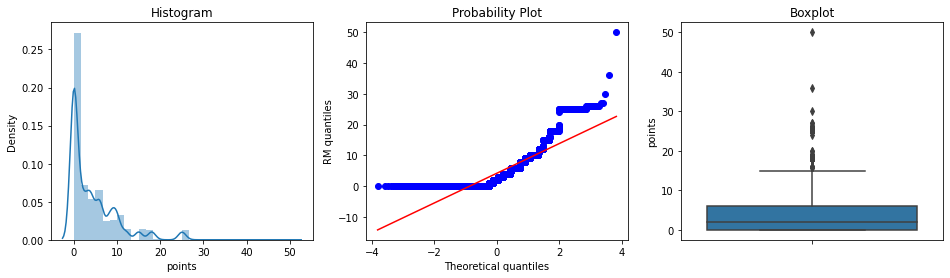

486

In [50]:
diagnostic_plots(df_new,'points')

upper_boundary1, lower_boundary1 = find_boundaries(df_new, 'points', 1.5)

outliers_vi = np.where(df_new['points'] > upper_boundary1, True,
                    np.where(df_new['points'] < lower_boundary1, True, False))

outliers_vi.sum()

In [51]:
df_new['points']= winsorise(df_new, 'points', df_new['points'].quantile(0.95),
                                   df_new['points'].quantile(0.05))

C:\Users\ryanm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


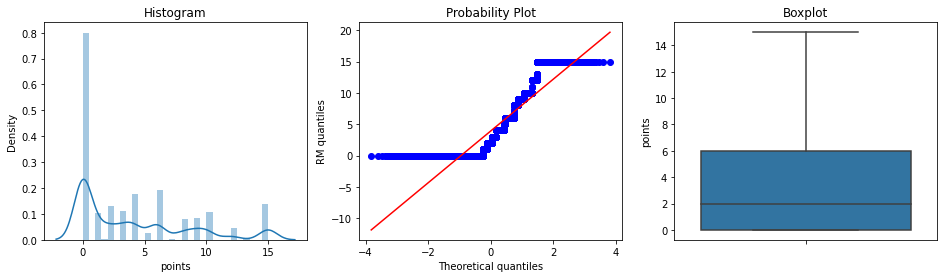

In [52]:
diagnostic_plots(df_new,'points')

### Laps Outliers

C:\Users\ryanm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


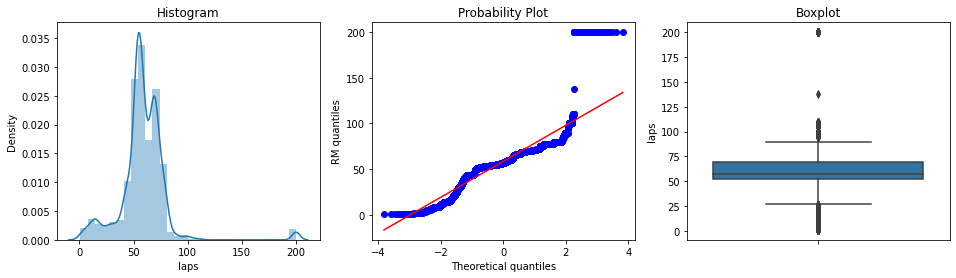

928

In [53]:
diagnostic_plots(df_new,'laps')

upper_boundary1, lower_boundary1 = find_boundaries(df_new, 'laps', 1.5)

outliers_vi = np.where(df_new['laps'] > upper_boundary1, True,
                    np.where(df_new['laps'] < lower_boundary1, True, False))

outliers_vi.sum()

In [54]:
df_new['laps']= winsorise(df_new, 'laps', df_new['laps'].quantile(0.95),
                                   df_new['laps'].quantile(0.05))

C:\Users\ryanm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


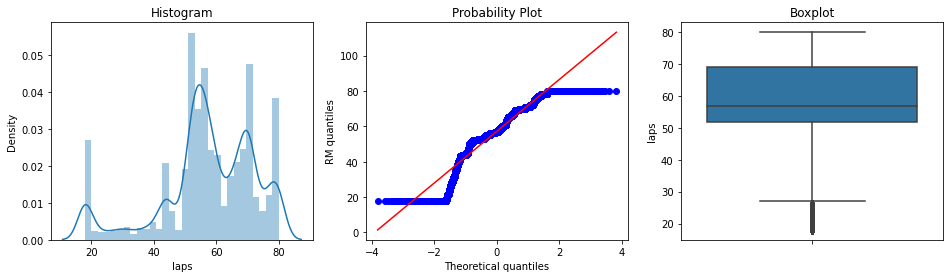

723

In [55]:
diagnostic_plots(df_new,'laps')

outliers_vi = np.where(df_new['laps'] > upper_boundary1, True,
                    np.where(df_new['laps'] < lower_boundary1, True, False))

outliers_vi.sum()

### Fastest Lap Outliers

C:\Users\ryanm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


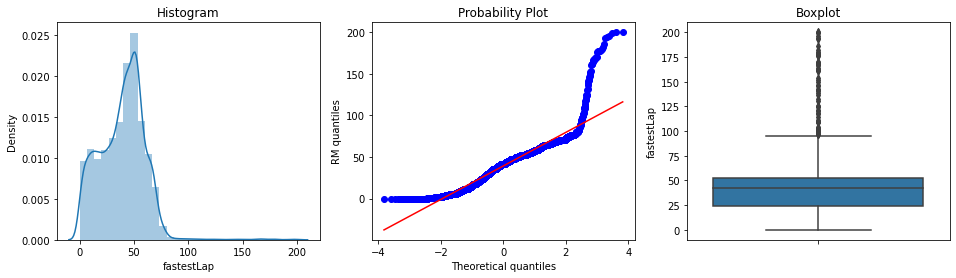

62

In [57]:
diagnostic_plots(df_new,'fastestLap')

upper_boundary1, lower_boundary1 = find_boundaries(df_new, 'fastestLap', 1.5)

outliers_vi = np.where(df_new['fastestLap'] > upper_boundary1, True,
                    np.where(df_new['fastestLap'] < lower_boundary1, True, False))

outliers_vi.sum()

In [58]:
df_new['fastestLap']= winsorise(df_new, 'fastestLap', df_new['fastestLap'].quantile(0.95),
                                   df_new['fastestLap'].quantile(0.05))

C:\Users\ryanm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


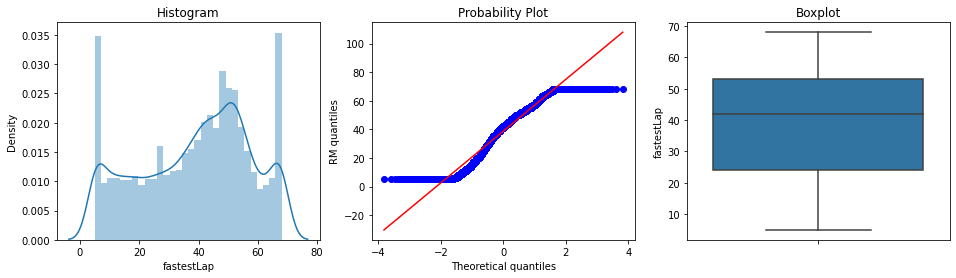

In [59]:
diagnostic_plots(df_new,'fastestLap')

### Round Outliers

C:\Users\ryanm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


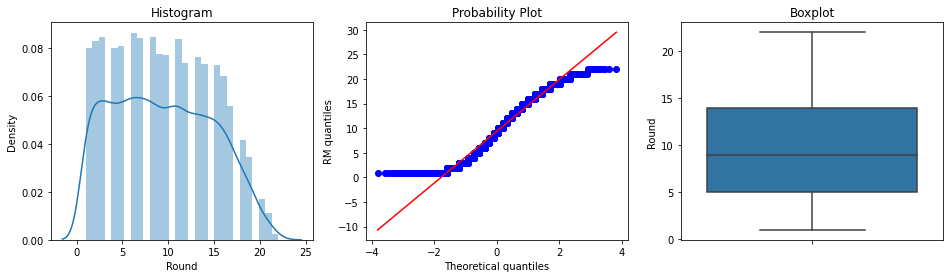

0

In [60]:
diagnostic_plots(df_new,'Round')

upper_boundary1, lower_boundary1 = find_boundaries(df_new, 'Round', 1.5)

outliers_vi = np.where(df_new['Round'] > upper_boundary1, True,
                    np.where(df_new['Round'] < lower_boundary1, True, False))

outliers_vi.sum()

### FastestLapMilliseconds Outliers

C:\Users\ryanm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


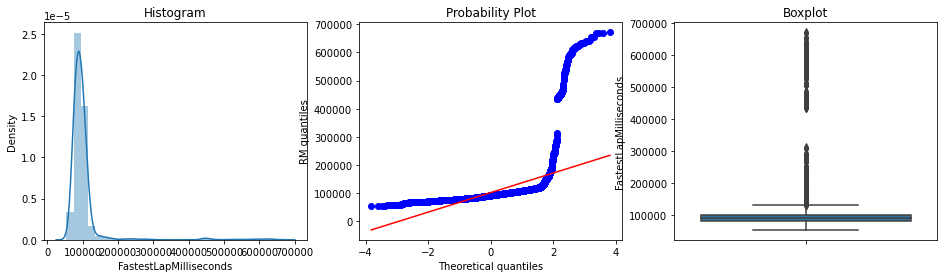

467

In [61]:
diagnostic_plots(df_new,'FastestLapMilliseconds')

upper_boundary1, lower_boundary1 = find_boundaries(df_new, 'FastestLapMilliseconds', 1.5)

outliers_vi = np.where(df_new['FastestLapMilliseconds'] > upper_boundary1, True,
                    np.where(df_new['FastestLapMilliseconds'] < lower_boundary1, True, False))

outliers_vi.sum()

In [62]:
df_new['FastestLapMilliseconds']= winsorise(df_new, 'FastestLapMilliseconds', df_new['FastestLapMilliseconds'].quantile(0.95),
                                   df_new['FastestLapMilliseconds'].quantile(0.05))

C:\Users\ryanm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


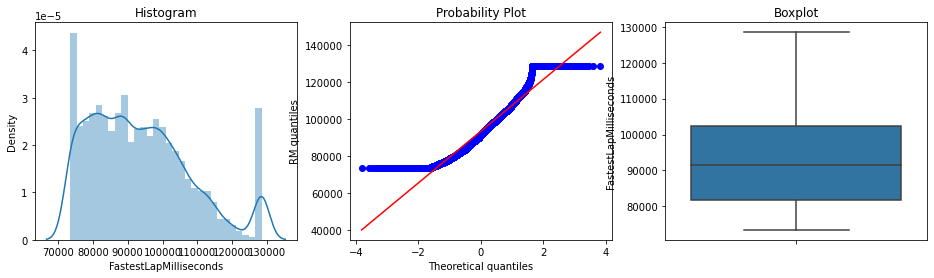

In [63]:
diagnostic_plots(df_new,'FastestLapMilliseconds')

## <u>3.3. Train-Test Split</u> <a id="part3.3"></a>

In [64]:
X_train, X_test, y_train, y_test = train_test_split(
    df_new.drop('FastestLapMilliseconds', axis=1), df_new['FastestLapMilliseconds'], test_size=0.3, random_state=123)

X_train.shape, X_test.shape

((7248, 13), (3107, 13))

## <u>3.4. Categorical Data Encoding</u> <a id="part3.4"></a>

In [65]:
cat_cols = [c for c in df_new.columns if df_new[c].dtype == 'O']
cat_cols 

['status', 'ConstructorNationality']

In [66]:
# One Hot Encoding

X_train_enc1 = X_train.copy()
X_test_enc1 = X_test.copy()
y_train_enc1 = y_train.copy()
y_test_enc1 = y_test.copy()

ohe_enc = OneHotEncoder(
    top_categories=None,
    drop_last=True)

ohe_enc.fit(X_train_enc1)

X_train_enc1 = ohe_enc.transform(X_train_enc1)
X_test_enc1 = ohe_enc.transform(X_test_enc1)

# Check For Model Performance
model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train_enc1, y_train_enc1)

print('train_mse:', mean_squared_error(y_train_enc1, model_linear_regression.predict(X_train_enc1)), 
      '\n test_mse:', mean_squared_error(y_test_enc1, model_linear_regression.predict(X_test_enc1)))

print('train_r-sq:', r2_score(y_train_enc1, model_linear_regression.predict(X_train_enc1)), 
      '\n test_r-sq:', r2_score(y_test_enc1, model_linear_regression.predict(X_test_enc1)))

train_mse: 87819891.17611077 
 test_mse: 90623144.68046467
train_r-sq: 0.5747564640905896 
 test_r-sq: 0.5642508085092572


In [67]:
# Ordinal Encoding

X_train_enc2 = X_train.copy()
X_test_enc2 = X_test.copy()
y_train_enc2 = y_train.copy()
y_test_enc2 = y_test.copy()

ordinal_enc = OrdinalEncoder(
    encoding_method='arbitrary',
    variables= None)

ordinal_enc.fit(X_train_enc2)

X_train_enc2 = ordinal_enc.transform(X_train_enc2)
X_test_enc2 = ordinal_enc.transform(X_test_enc2)

# Check For Model Performance
model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train_enc2, y_train_enc2)

print('train_mse:', mean_squared_error(y_train_enc2, model_linear_regression.predict(X_train_enc2)))

print('train_r-sq:', r2_score(y_train_enc2, model_linear_regression.predict(X_train_enc2)))

train_mse: 106073822.8639251
train_r-sq: 0.48636684812524256


C:\Users\ryanm\anaconda3\lib\site-packages\feature_engine\encoding\base_encoder.py:257: UserWarning: During the encoding, NaN values were introduced in the feature(s) status.
  warnings.warn(


In [68]:
# Counts/Frequency Encoding

X_train_enc3 = X_train.copy()
X_test_enc3 = X_test.copy()
y_train_enc3 = y_train.copy()
y_test_enc3 = y_test.copy()

count_enc = CountFrequencyEncoder(
    encoding_method='count', 
    variables=None)

count_enc.fit(X_train_enc3)

X_train_enc3 = count_enc.transform(X_train_enc3)
X_test_enc3 = count_enc.transform(X_test_enc3)

# Check For Model Performance
model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train_enc3, y_train_enc3)

print('train_mse:', mean_squared_error(y_train_enc3, model_linear_regression.predict(X_train_enc3)))

print('train_r-sq:', r2_score(y_train_enc3, model_linear_regression.predict(X_train_enc3)))

train_mse: 106930672.94882308
train_r-sq: 0.48221778855608866


C:\Users\ryanm\anaconda3\lib\site-packages\feature_engine\encoding\base_encoder.py:257: UserWarning: During the encoding, NaN values were introduced in the feature(s) status.
  warnings.warn(


In [69]:
# Target Mean Encoding

X_train_enc4 = X_train.copy()
X_test_enc4 = X_test.copy()
y_train_enc4 = y_train.copy()
y_test_enc4 = y_test.copy()

mean_enc = MeanEncoder(variables=None)

mean_enc.fit(X_train_enc4, y_train_enc4)

X_train_enc4 = mean_enc.transform(X_train_enc4)
X_test_enc4 = mean_enc.transform(X_test_enc4)

# Check For Model Performance
model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train_enc4, y_train_enc4)

print('train_mse:', mean_squared_error(y_train_enc4, model_linear_regression.predict(X_train_enc4)))

print('train_r-sq:', r2_score(y_train_enc4, model_linear_regression.predict(X_train_enc4)))

train_mse: 109931972.70447621
train_r-sq: 0.46768482451655713


C:\Users\ryanm\anaconda3\lib\site-packages\feature_engine\encoding\base_encoder.py:257: UserWarning: During the encoding, NaN values were introduced in the feature(s) status.
  warnings.warn(


In [70]:
# Use the Most Appropriate Encoding Method 

ohe_enc = OneHotEncoder(
    top_categories=None,
    drop_last=True)

ohe_enc.fit(X_train)

X_train = ohe_enc.transform(X_train)
X_test= ohe_enc.transform(X_test)

# Check For Model Performance
model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train, y_train)

print('train_mse:', mean_squared_error(y_train, model_linear_regression.predict(X_train)), 
      '\n test_mse:', mean_squared_error(y_test, model_linear_regression.predict(X_test)))

print('train_r-sq:', r2_score(y_train, model_linear_regression.predict(X_train)), 
      '\n test_r-sq:', r2_score(y_test, model_linear_regression.predict(X_test)))

train_mse: 87819891.17611077 
 test_mse: 90623144.68046467
train_r-sq: 0.5747564640905896 
 test_r-sq: 0.5642508085092572


## <u>3.5. Numerical Data Transformation</u> <a id="part3.5"></a>

In [71]:
# Showing the numerical data from the original dataset

num_var =[c for c in df_new.columns if df_new[c].dtype != 'O']
num_var

['points',
 'laps',
 'fastestLap',
 'Round',
 'DriverYearDOB',
 'DriverQuarterDOB',
 'DriverMonthDOB',
 'DriverDayDOB',
 'RaceDateQuarter',
 'RaceDateMonth',
 'RaceDateDay',
 'FastestLapMilliseconds']

###  _Points_

C:\Users\ryanm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


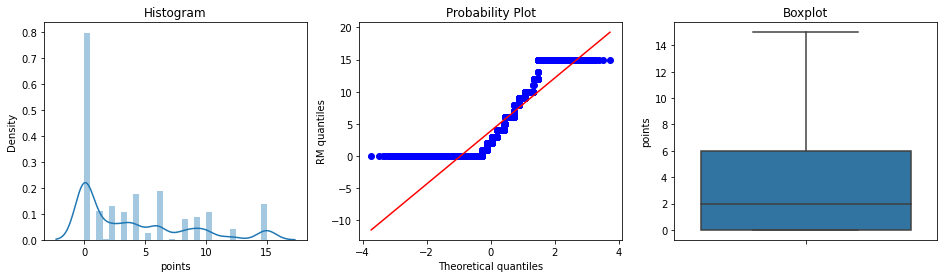

In [72]:
diagnostic_plots(X_train,'points')

C:\Users\ryanm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


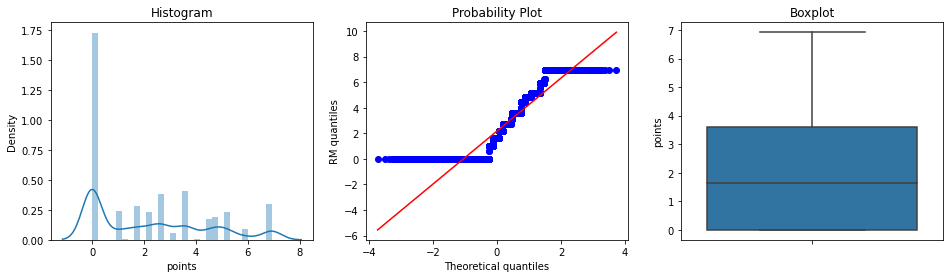

train_mse: 87812729.70934968 
 test_mse: 90781510.38154705
train_r-sq: 0.5747911415128342 
 test_r-sq: 0.5634893283548239


In [73]:
# Power Transformations

pt_xtrain1 = X_train.copy()
pt_xtest1 = X_test.copy()
pt_ytrain1 = y_train.copy()
pt_ytest1 = y_test.copy()

lt = PowerTransformer(variables=['points'], exp = 1/1.4)

lt.fit(pt_xtrain1)

pt_xtrain1 = lt.transform(pt_xtrain1)

diagnostic_plots(pt_xtrain1,'points')

model_linear_regression = LinearRegression()
model_linear_regression.fit(pt_xtrain1, pt_ytrain1)

print('train_mse:', mean_squared_error(pt_ytrain1, model_linear_regression.predict(pt_xtrain1)), 
      '\n test_mse:', mean_squared_error(pt_ytest1, model_linear_regression.predict(pt_xtest1)))

print('train_r-sq:', r2_score(pt_ytrain1, model_linear_regression.predict(pt_xtrain1)), 
      '\n test_r-sq:', r2_score(pt_ytest1, model_linear_regression.predict(pt_xtest1)))

C:\Users\ryanm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


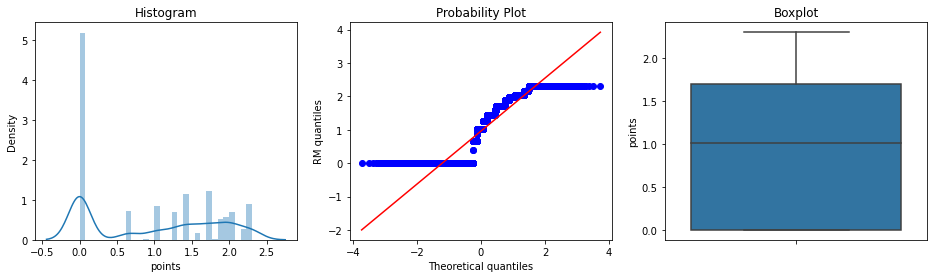

In [74]:
# YeoJohnson Transformation

yj_xtrain1 = X_train.copy()
yj_xtest1 = X_test.copy()

lt = YeoJohnsonTransformer(variables=['points'])

lt.fit(yj_xtrain1)

yj_xtrain1 = lt.transform(yj_xtrain1)

diagnostic_plots(yj_xtrain1,'points')

**Results:** Out of the possible methods used, the methods present an extremely insignificant change or improvement to achieve a Gaussian distribution. Hence, I will not be using any transformation methods on Points.

###  _Laps_

C:\Users\ryanm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


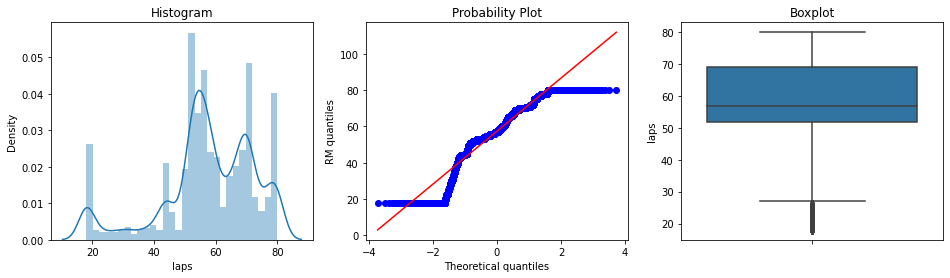

In [75]:
diagnostic_plots(X_train,'laps')

C:\Users\ryanm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


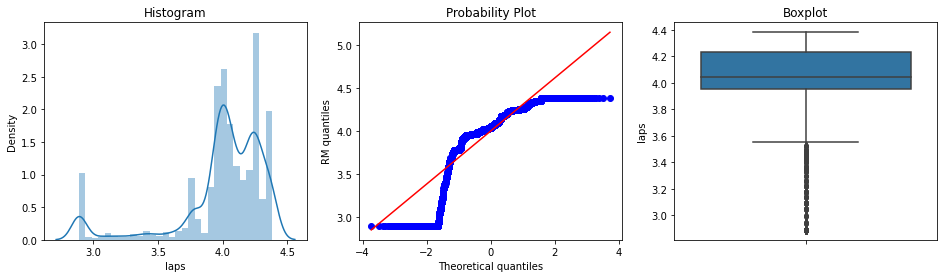

train_mse: 106832210.41537131 
 test_mse: 2711859672550.3354
train_r-sq: 0.48269456614393214 
 test_r-sq: -13038.612164384449


In [76]:
# Logarithmic Transformation

log_xtrain2 = X_train.copy()
log_xtest2 = X_test.copy()
log_ytrain2 = y_train.copy()
log_ytest2 = y_test.copy()

lt = LogTransformer(variables=['laps'])

lt.fit(log_xtrain2)

log_xtrain2 = lt.transform(log_xtrain2)

diagnostic_plots(log_xtrain2,'laps')

model_linear_regression = LinearRegression()
model_linear_regression.fit(log_xtrain2, log_ytrain2)

print('train_mse:', mean_squared_error(log_ytrain2, model_linear_regression.predict(log_xtrain2)), 
      '\n test_mse:', mean_squared_error(log_ytest2, model_linear_regression.predict(log_xtest2)))

print('train_r-sq:', r2_score(log_ytrain2, model_linear_regression.predict(log_xtrain2)), 
      '\n test_r-sq:', r2_score(log_ytest2, model_linear_regression.predict(log_xtest2)))

C:\Users\ryanm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


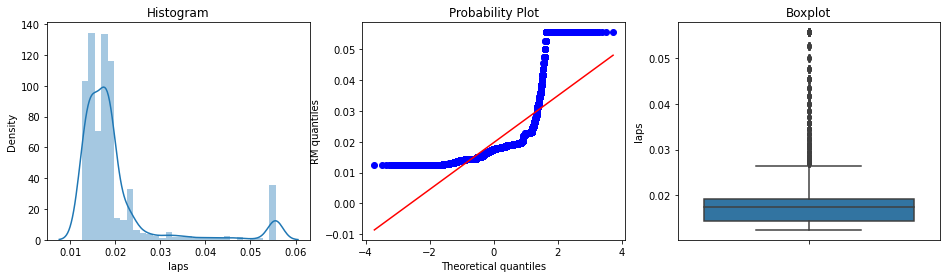

In [77]:
# Reciprocal Transformation

rt_xtrain2 = X_train.copy()
rt_xtest2 = X_test.copy()

lt = ReciprocalTransformer(variables=['laps'])

lt.fit(rt_xtrain2)

rt_xtrain2 = lt.transform(rt_xtrain2)

diagnostic_plots(rt_xtrain2,'laps')

C:\Users\ryanm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


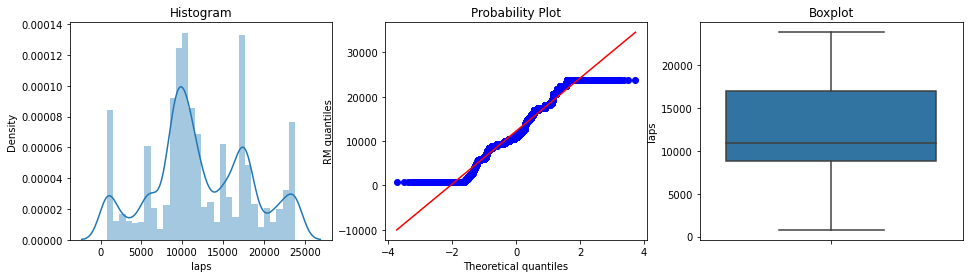

In [78]:
# Power Transformations

pt_xtrain2 = X_train.copy()
pt_xtest2 = X_test.copy()
pt_ytrain2 = y_train.copy()
pt_ytest2 = y_test.copy()

lt = PowerTransformer(variables=['laps'], exp = 2.3)

lt.fit(pt_xtrain2)

pt_xtrain2 = lt.transform(pt_xtrain2)

diagnostic_plots(pt_xtrain2,'laps')

In [79]:
model_linear_regression = LinearRegression()
model_linear_regression.fit(log_xtrain2, log_ytrain2)

print('train_mse:', mean_squared_error(pt_ytrain2, model_linear_regression.predict(pt_xtrain2)), 
      '\n test_mse:', mean_squared_error(pt_ytest2, model_linear_regression.predict(pt_xtest2)))

print('train_r-sq:', r2_score(pt_ytrain2, model_linear_regression.predict(pt_xtrain2)), 
      '\n test_r-sq:', r2_score(pt_ytest2, model_linear_regression.predict(pt_xtest2)))

train_mse: 1.6783945876196874e+17 
 test_mse: 2711859672550.3354
train_r-sq: -812716161.058698 
 test_r-sq: -13038.612164384449


C:\Users\ryanm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


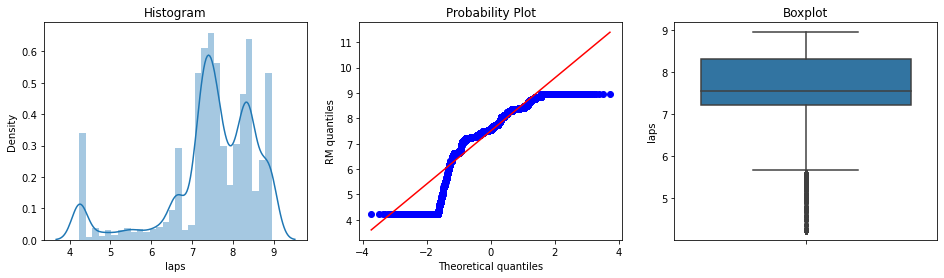

train_mse: 95847054.87210877 
 test_mse: 271933387009.5584
train_r-sq: 0.53588714385237 
 test_r-sq: -1306.5550837102858


In [80]:
# Square-Cube Root Transformation

sq_xtrain2 = X_train.copy()
sq_xtest2 = X_test.copy()
sq_ytrain2 = y_train.copy()
sq_ytest2 = y_test.copy()

lt = PowerTransformer(variables=['laps'], exp = 1/2)

lt.fit(sq_xtrain2)

sq_xtrain2 = lt.transform(sq_xtrain2)

diagnostic_plots(sq_xtrain2,'laps')

model_linear_regression = LinearRegression()
model_linear_regression.fit(sq_xtrain2, sq_ytrain2)

print('train_mse:', mean_squared_error(sq_ytrain2, model_linear_regression.predict(sq_xtrain2)), 
      '\n test_mse:', mean_squared_error(sq_ytest2, model_linear_regression.predict(sq_xtest2)))

print('train_r-sq:', r2_score(sq_ytrain2, model_linear_regression.predict(sq_xtrain2)), 
      '\n test_r-sq:', r2_score(sq_ytest2, model_linear_regression.predict(sq_xtest2)))

C:\Users\ryanm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


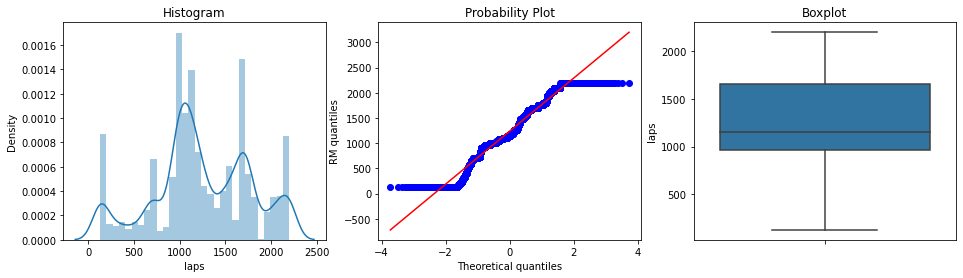

In [81]:
# BoxCox Transformation

bc_xtrain2 = X_train.copy()
bc_xtest2 = X_test.copy()

lt = BoxCoxTransformer(variables=['laps'])

lt.fit(bc_xtrain2)

bc_xtrain2 = lt.transform(bc_xtrain2)

diagnostic_plots(bc_xtrain2,'laps')

C:\Users\ryanm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


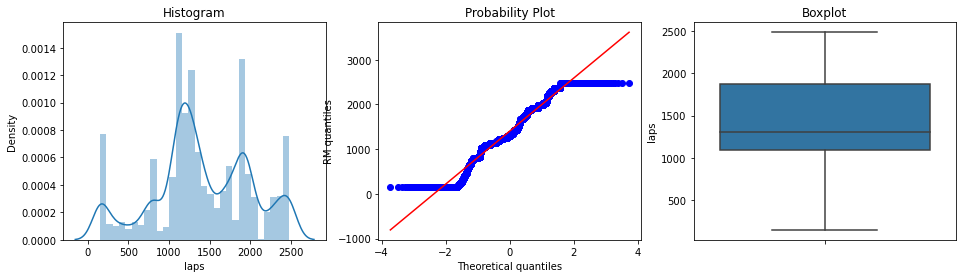

In [82]:
yj_xtrain2 = X_train.copy()
yj_xtest2 = X_test.copy()

lt = YeoJohnsonTransformer(variables=['laps'])

lt.fit(yj_xtrain2)

yj_xtrain2 = lt.transform(yj_xtrain2)

diagnostic_plots(yj_xtrain2,'laps')

###  _Round_

C:\Users\ryanm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


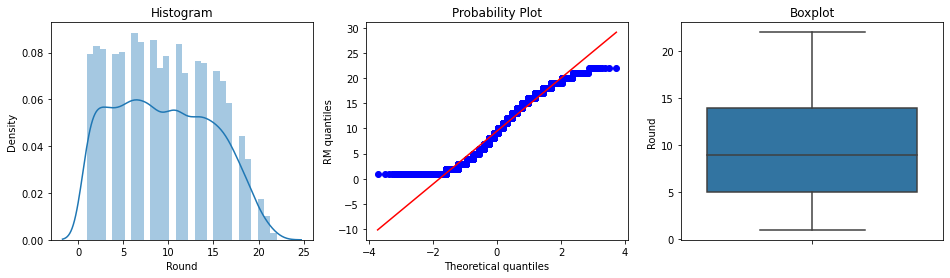

In [83]:
diagnostic_plots(X_train,'Round')

C:\Users\ryanm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


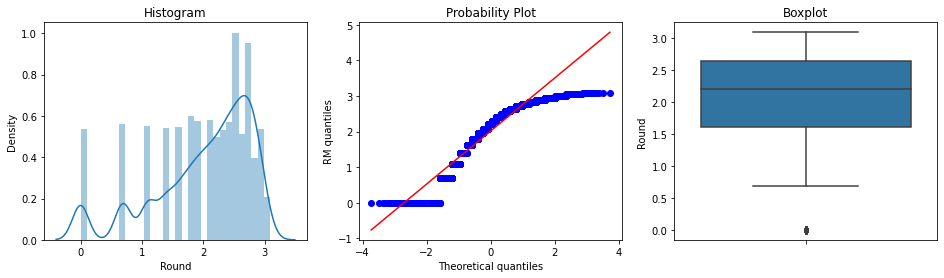

train_mse: 87109092.6691062 
 test_mse: 1285721449.2668192
train_r-sq: 0.5781983092852233 
 test_r-sq: -5.182218504729224


In [84]:
# Logarithmic Transformation

log_xtrain3 = X_train.copy()
log_xtest3 = X_test.copy()
log_ytrain3 = y_train.copy()
log_ytest3 = y_test.copy()

lt = LogTransformer(variables=['Round'])

lt.fit(log_xtrain3)

log_xtrain3 = lt.transform(log_xtrain3)

diagnostic_plots(log_xtrain3,'Round')

model_linear_regression = LinearRegression()
model_linear_regression.fit(log_xtrain3, log_ytrain3)

print('train_mse:', mean_squared_error(log_ytrain3, model_linear_regression.predict(log_xtrain3)), 
      '\n test_mse:', mean_squared_error(log_ytest3, model_linear_regression.predict(log_xtest3)))

print('train_r-sq:', r2_score(log_ytrain3, model_linear_regression.predict(log_xtrain3)), 
      '\n test_r-sq:', r2_score(log_ytest3, model_linear_regression.predict(log_xtest3)))

C:\Users\ryanm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


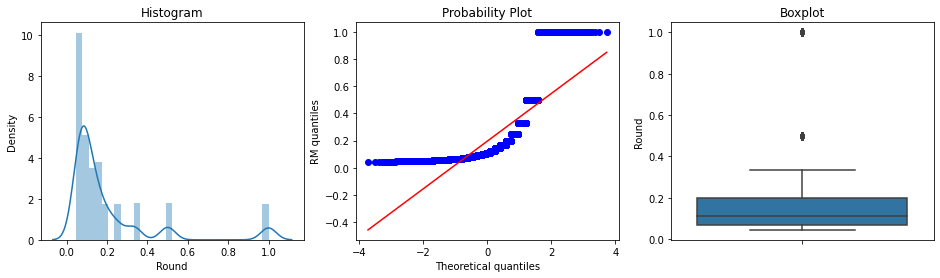

In [85]:
# Reciprocal Transformation

rt_xtrain3 = X_train.copy()
rt_xtest3 = X_test.copy()

lt = ReciprocalTransformer(variables=['Round'])

lt.fit(rt_xtrain3)

rt_xtrain3 = lt.transform(rt_xtrain3)

diagnostic_plots(rt_xtrain3,'Round')

C:\Users\ryanm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


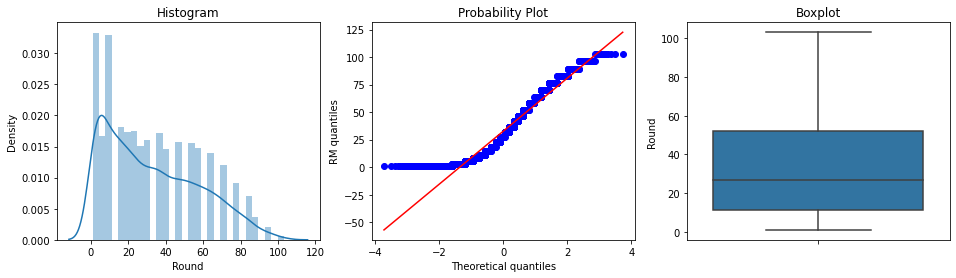

In [86]:
# Power Transformations

pt_xtrain3 = X_train.copy()
pt_xtest3 = X_test.copy()

lt = PowerTransformer(variables=['Round'], exp = 1.5)

lt.fit(pt_xtrain3)

pt_xtrain3 = lt.transform(pt_xtrain3)

diagnostic_plots(pt_xtrain3,'Round')

C:\Users\ryanm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


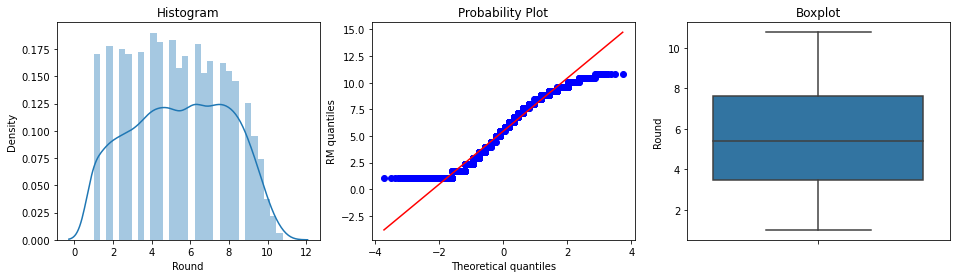

train_mse: 87339013.41725297 
 test_mse: 151585348.73609346
train_r-sq: 0.5770849816482668 
 test_r-sq: 0.27112225705147186


In [87]:
# Square-Cube Root Transformation

sq_xtrain3 = X_train.copy()
sq_xtest3 = X_test.copy()
sq_ytrain3 = y_train.copy()
sq_ytest3 = y_test.copy()

lt = PowerTransformer(variables=['Round'], exp = 1/1.3)

lt.fit(sq_xtrain3)

sq_xtrain3 = lt.transform(sq_xtrain3)

diagnostic_plots(sq_xtrain3,'Round')

model_linear_regression = LinearRegression()
model_linear_regression.fit(sq_xtrain3, sq_ytrain3)

print('train_mse:', mean_squared_error(sq_ytrain3, model_linear_regression.predict(sq_xtrain3)), 
      '\n test_mse:', mean_squared_error(sq_ytest3, model_linear_regression.predict(sq_xtest3)))

print('train_r-sq:', r2_score(sq_ytrain3, model_linear_regression.predict(sq_xtrain3)), 
      '\n test_r-sq:', r2_score(sq_ytest3, model_linear_regression.predict(sq_xtest3)))

C:\Users\ryanm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


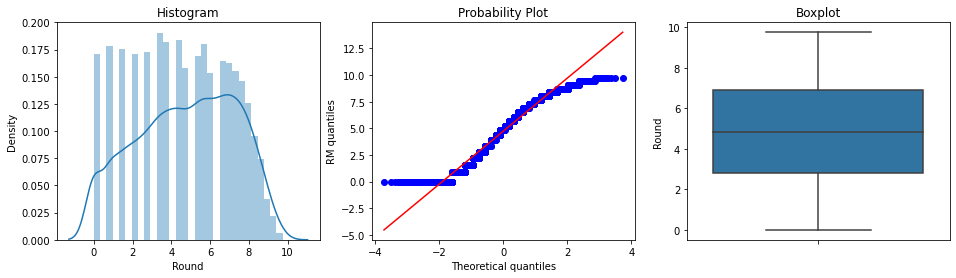

In [88]:
# BoxCox Transformation

bc_xtrain3 = X_train.copy()
bc_xtest3 = X_test.copy()

lt = BoxCoxTransformer(variables=['Round'])

lt.fit(bc_xtrain3)

bc_xtrain3 = lt.transform(bc_xtrain3)

diagnostic_plots(bc_xtrain3,'Round')

C:\Users\ryanm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


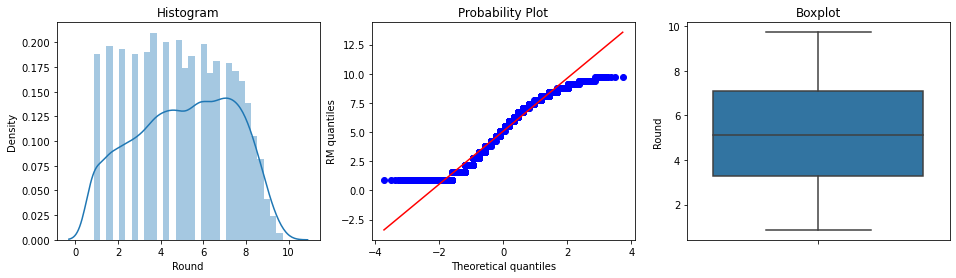

In [89]:
# YeoJohnson Transformation

yj_xtrain3 = X_train.copy()
yj_xtest3 = X_test.copy()

lt = YeoJohnsonTransformer(variables=['Round'])

lt.fit(yj_xtrain3)

yj_xtrain3 = lt.transform(yj_xtrain3)

diagnostic_plots(yj_xtrain3,'Round')

###  _Fastest Lap_

C:\Users\ryanm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


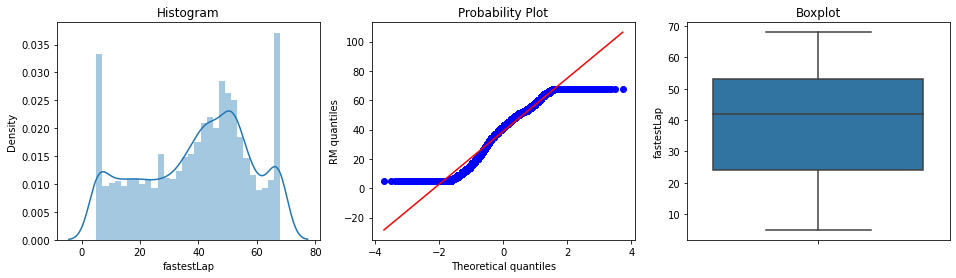

In [90]:
diagnostic_plots(X_train,'fastestLap')

C:\Users\ryanm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


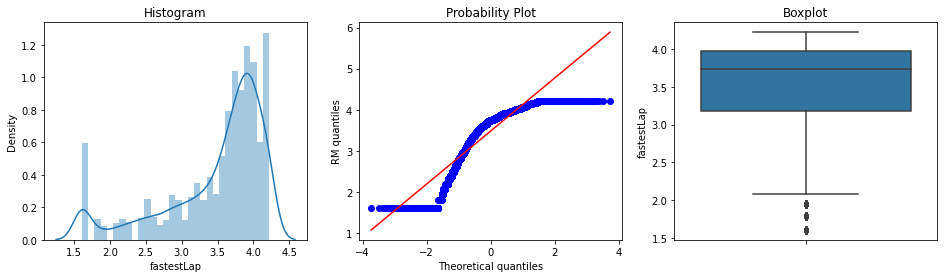

train_mse: 87537728.3179523 
 test_mse: 1471688613.3369114
train_r-sq: 0.5761227596974128 
 test_r-sq: -6.076416578224653


In [91]:
# Logarithmic Transformation

log_xtrain4 = X_train.copy()
log_xtest4 = X_test.copy()
log_ytrain4 = y_train.copy()
log_ytest4 = y_test.copy()

lt = LogTransformer(variables=['fastestLap'])

lt.fit(log_xtrain4)

log_xtrain4 = lt.transform(log_xtrain4)

diagnostic_plots(log_xtrain4,'fastestLap')

model_linear_regression = LinearRegression()
model_linear_regression.fit(log_xtrain4, log_ytrain4)

print('train_mse:', mean_squared_error(log_ytrain4, model_linear_regression.predict(log_xtrain4)), 
      '\n test_mse:', mean_squared_error(log_ytest4, model_linear_regression.predict(log_xtest4)))

print('train_r-sq:', r2_score(log_ytrain4, model_linear_regression.predict(log_xtrain4)), 
      '\n test_r-sq:', r2_score(log_ytest4, model_linear_regression.predict(log_xtest4)))

C:\Users\ryanm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


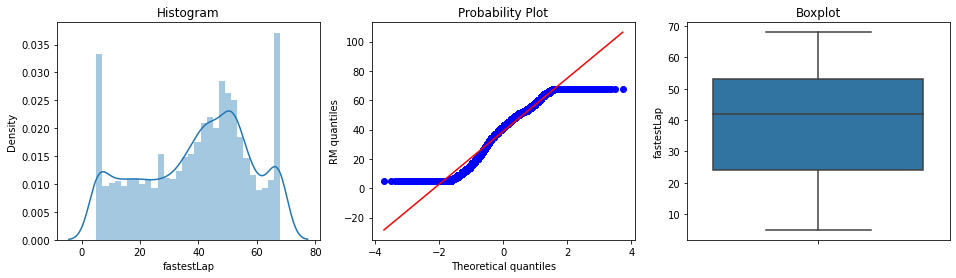

In [92]:
# Reciprocal Transformation

rt_xtrain4 = X_train.copy()
rt_xtest4 = X_test.copy()

lt = ReciprocalTransformer(variables=['fastestLap'])

lt.fit(rt_xtrain4)

rt_xtrain1 = lt.transform(rt_xtrain4)

diagnostic_plots(rt_xtrain4,'fastestLap')

C:\Users\ryanm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


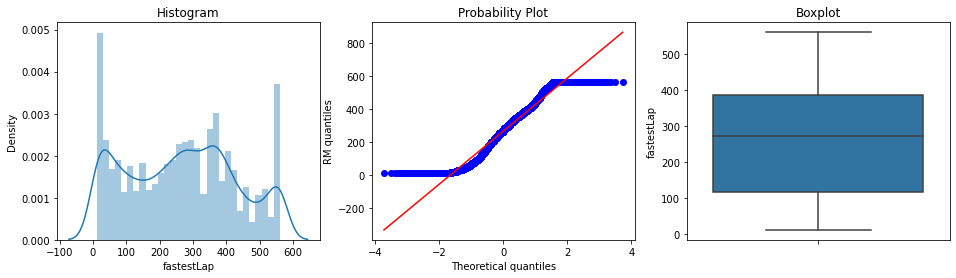

In [93]:
# Power Transformations

pt_xtrain4 = X_train.copy()
pt_xtest4 = X_test.copy()

lt = PowerTransformer(variables=['fastestLap'], exp = 1.5)

lt.fit(pt_xtrain4)

pt_xtrain4 = lt.transform(pt_xtrain4)

diagnostic_plots(pt_xtrain4,'fastestLap')

C:\Users\ryanm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


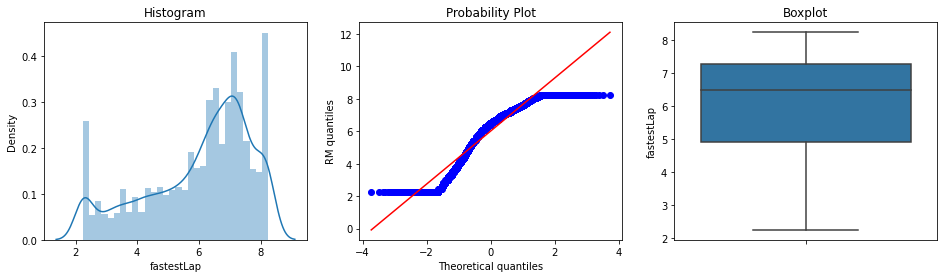

train_mse: 87732368.60628241 
 test_mse: 155389297.78902522
train_r-sq: 0.5751802679300985 
 test_r-sq: 0.2528314801188071


In [94]:
# Square-Cube Root Transformation

sq_xtrain4 = X_train.copy()
sq_xtest4 = X_test.copy()
sq_ytrain4 = y_train.copy()
sq_ytest4 = y_test.copy()

lt = PowerTransformer(variables=['fastestLap'], exp = 1/2)

lt.fit(sq_xtrain4)

sq_xtrain4 = lt.transform(sq_xtrain4)

diagnostic_plots(sq_xtrain4,'fastestLap')

model_linear_regression = LinearRegression()
model_linear_regression.fit(sq_xtrain4, sq_ytrain4)

print('train_mse:', mean_squared_error(sq_ytrain4, model_linear_regression.predict(sq_xtrain4)), 
      '\n test_mse:', mean_squared_error(sq_ytest4, model_linear_regression.predict(sq_xtest4)))

print('train_r-sq:', r2_score(sq_ytrain4, model_linear_regression.predict(sq_xtrain4)), 
      '\n test_r-sq:', r2_score(sq_ytest4, model_linear_regression.predict(sq_xtest4)))

C:\Users\ryanm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


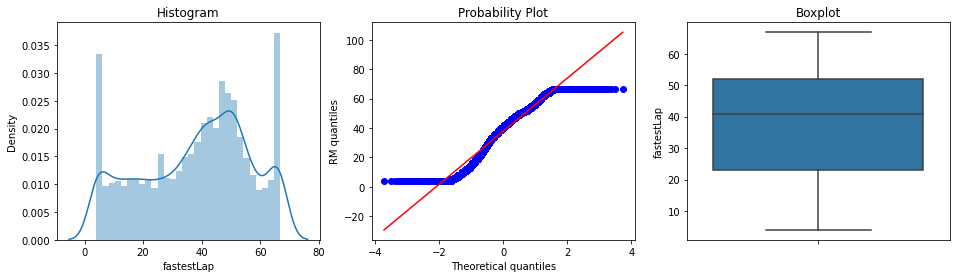

In [95]:
# BoxCox Transformation

bc_xtrain4 = X_train.copy()
bc_xtest4 = X_test.copy()

lt = BoxCoxTransformer(variables=['fastestLap'])

lt.fit(bc_xtrain4)

bc_xtrain4 = lt.transform(bc_xtrain4)

diagnostic_plots(bc_xtrain4,'fastestLap')

C:\Users\ryanm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


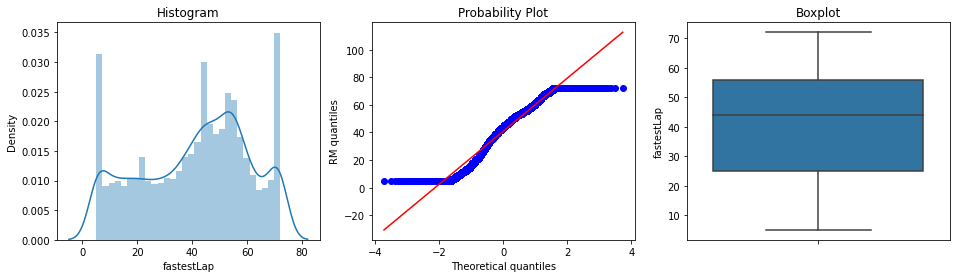

In [96]:
# YeoJohnson Transformation

yj_xtrain4 = X_train.copy()
yj_xtest4 = X_test.copy()

lt = YeoJohnsonTransformer(variables=['fastestLap'])

lt.fit(yj_xtrain4)

yj_xtrain4 = lt.transform(yj_xtrain4)

diagnostic_plots(yj_xtrain4,'fastestLap')

## <u>3.6. Variable Binning/Discretization</u> <a id="part3.6"></a>

In [97]:
disc = ['points','laps','fastestLap','Round']

### _Points_

train_mse: 87821956.91046262 
 test_mse: 90622449.16101494
train_r-sq: 0.5747464613432818 
 test_r-sq: 0.5642541528209003


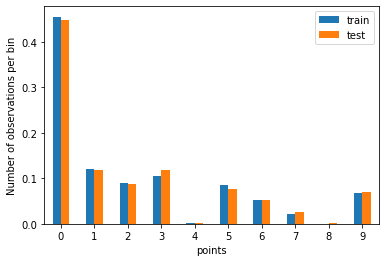

In [98]:
# Equal Width Discretization

X_train1 = X_train.copy()
X_test1 = X_test.copy()
y_train1 = y_train.copy()
y_test1 = y_test.copy()

disc1 = EqualWidthDiscretiser(bins=10, variables = disc[0])

disc1.fit(X_train1)

X_train1 = disc1.transform(X_train1)
X_test1 = disc1.transform(X_test1)

t1 = X_train1.groupby(['points'])['points'].count() / len(X_train1)
t2 = X_test1.groupby(['points'])['points'].count() / len(X_test1)

# concatenate aggregated views
tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']

# plot
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train1, y_train1)

print('train_mse:', mean_squared_error(y_train1, model_linear_regression.predict(X_train1)), 
      '\n test_mse:', mean_squared_error(y_test1, model_linear_regression.predict(X_test1)))

print('train_r-sq:', r2_score(y_train1, model_linear_regression.predict(X_train1)), 
      '\n test_r-sq:', r2_score(y_test1, model_linear_regression.predict(X_test1)))

train_mse: 87821633.1588885 
 test_mse: 90609839.76985544
train_r-sq: 0.5747480290207441 
 test_r-sq: 0.5643147833808121


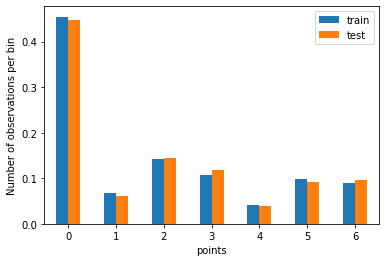

In [99]:
# Equal Frequency Discretization 

X_train2 = X_train.copy()
X_test2 = X_test.copy()
y_train2 = y_train.copy()
y_test2 = y_test.copy()

disc2 = EqualFrequencyDiscretiser(q=10, variables = disc[0])

disc2.fit(X_train2)

X_train2 = disc2.transform(X_train2)
X_test2 = disc2.transform(X_test2)

t1 = X_train2.groupby(['points'])['points'].count() / len(X_train2)
t2 = X_test2.groupby(['points'])['points'].count() / len(X_test2)

# concatenate aggregated views
tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']

# plot
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train2, y_train2)

print('train_mse:', mean_squared_error(y_train2, model_linear_regression.predict(X_train2)), 
      '\n test_mse:', mean_squared_error(y_test2, model_linear_regression.predict(X_test2)))

print('train_r-sq:', r2_score(y_train2, model_linear_regression.predict(X_train2)), 
      '\n test_r-sq:', r2_score(y_test2, model_linear_regression.predict(X_test2)))

### _Laps_

train_mse: 88280479.58470966 
 test_mse: 90307010.39198288
train_r-sq: 0.5725261921004011 
 test_r-sq: 0.5657708976773629


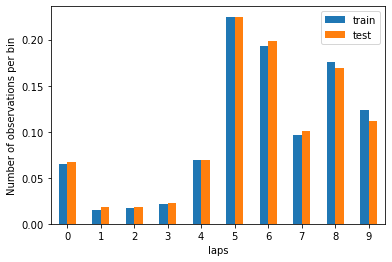

In [100]:
# Equal Width Discretization

X_train3 = X_train.copy()
X_test3 = X_test.copy()
y_train3 = y_train.copy()
y_test3 = y_test.copy()

disc3 = EqualWidthDiscretiser(bins=10, variables = disc[1])

disc3.fit(X_train3)

X_train3 = disc3.transform(X_train3)
X_test3 = disc3.transform(X_test3)

t1 = X_train3.groupby(['laps'])['laps'].count() / len(X_train3)
t2 = X_test3.groupby(['laps'])['laps'].count() / len(X_test3)

# concatenate aggregated views
tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']

# plot
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train3, y_train3)

print('train_mse:', mean_squared_error(y_train3, model_linear_regression.predict(X_train3)), 
      '\n test_mse:', mean_squared_error(y_test3, model_linear_regression.predict(X_test3)))

print('train_r-sq:', r2_score(y_train3, model_linear_regression.predict(X_train3)), 
      '\n test_r-sq:', r2_score(y_test3, model_linear_regression.predict(X_test3)))

train_mse: 85158714.41824447 
 test_mse: 85068095.81822532
train_r-sq: 0.5876424765763673 
 test_r-sq: 0.5909615131415825


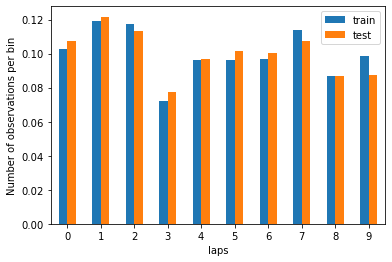

In [101]:
# Equal Frequency Discretization 

X_train4 = X_train.copy()
X_test4 = X_test.copy()
y_train4 = y_train.copy()
y_test4 = y_test.copy()

disc4 = EqualFrequencyDiscretiser(q=10, variables = disc[1], return_object = True)

disc4.fit(X_train4)

X_train4 = disc4.transform(X_train4)
X_test4 = disc4.transform(X_test4)

t1 = X_train4.groupby(['laps'])['laps'].count() / len(X_train4)
t2 = X_test4.groupby(['laps'])['laps'].count() / len(X_test4)

# concatenate aggregated views
tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']

# plot
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train4, y_train4)

print('train_mse:', mean_squared_error(y_train4, model_linear_regression.predict(X_train4)), 
      '\n test_mse:', mean_squared_error(y_test4, model_linear_regression.predict(X_test4)))

print('train_r-sq:', r2_score(y_train4, model_linear_regression.predict(X_train4)), 
      '\n test_r-sq:', r2_score(y_test4, model_linear_regression.predict(X_test4)))

### _FastestLap_

train_mse: 87817652.9146904 
 test_mse: 90608414.85065205
train_r-sq: 0.5747673022525133 
 test_r-sq: 0.5643216349129787


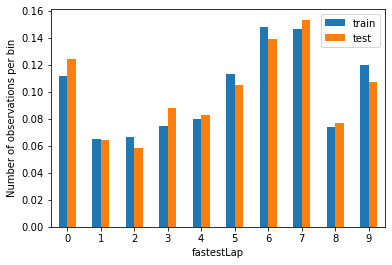

In [102]:
# Equal Width Discretization

X_train5 = X_train.copy()
X_test5 = X_test.copy()
y_train5 = y_train.copy()
y_test5 = y_test.copy()

disc5 = EqualWidthDiscretiser(bins=10, variables = disc[2])

disc5.fit(X_train5)

X_train5 = disc5.transform(X_train5)
X_test5 = disc5.transform(X_test5)

t1 = X_train5.groupby(['fastestLap'])['fastestLap'].count() / len(X_train5)
t2 = X_test5.groupby(['fastestLap'])['fastestLap'].count() / len(X_test5)

# concatenate aggregated views
tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']

# plot
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train5, y_train5)

print('train_mse:', mean_squared_error(y_train5, model_linear_regression.predict(X_train5)), 
      '\n test_mse:', mean_squared_error(y_test5, model_linear_regression.predict(X_test5)))

print('train_r-sq:', r2_score(y_train5, model_linear_regression.predict(X_train5)), 
      '\n test_r-sq:', r2_score(y_test5, model_linear_regression.predict(X_test5)))

train_mse: 87777006.10699287 
 test_mse: 90637361.663032
train_r-sq: 0.5749641231776732 
 test_r-sq: 0.5641824480624753


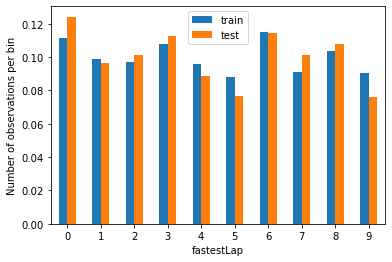

In [103]:
# Equal Frequency Discretization 

X_train6 = X_train.copy()
X_test6 = X_test.copy()
y_train6 = y_train.copy()
y_test6 = y_test.copy()

disc6 = EqualFrequencyDiscretiser(q=10, variables = disc[2], return_object = True)

disc6.fit(X_train6)

X_train6 = disc6.transform(X_train6)
X_test6 = disc6.transform(X_test6)

t1 = X_train6.groupby(['fastestLap'])['fastestLap'].count() / len(X_train6)
t2 = X_test6.groupby(['fastestLap'])['fastestLap'].count() / len(X_test6)

# concatenate aggregated views
tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']

# plot
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train6, y_train6)

print('train_mse:', mean_squared_error(y_train6, model_linear_regression.predict(X_train6)), 
      '\n test_mse:', mean_squared_error(y_test6, model_linear_regression.predict(X_test6)))

print('train_r-sq:', r2_score(y_train6, model_linear_regression.predict(X_train6)), 
      '\n test_r-sq:', r2_score(y_test6, model_linear_regression.predict(X_test6)))

### _Round_

train_mse: 87824235.95289665 
 test_mse: 90757526.89433643
train_r-sq: 0.5747354257105777 
 test_r-sq: 0.5636046497244145


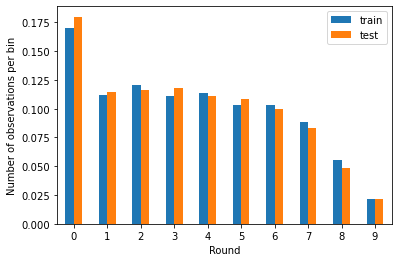

In [104]:
# Equal Width Discretization

X_train7 = X_train.copy()
X_test7 = X_test.copy()
y_train7 = y_train.copy()
y_test7 = y_test.copy()

disc7 = EqualWidthDiscretiser(bins=10, variables = disc[3])

disc7.fit(X_train7)

X_train7 = disc7.transform(X_train7)
X_test7 = disc7.transform(X_test7)

t1 = X_train7.groupby(['Round'])['Round'].count() / len(X_train7)
t2 = X_test7.groupby(['Round'])['Round'].count() / len(X_test7)

# concatenate aggregated views
tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']

# plot
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train7, y_train7)

print('train_mse:', mean_squared_error(y_train7, model_linear_regression.predict(X_train7)), 
      '\n test_mse:', mean_squared_error(y_test7, model_linear_regression.predict(X_test7)))

print('train_r-sq:', r2_score(y_train7, model_linear_regression.predict(X_train7)), 
      '\n test_r-sq:', r2_score(y_test7, model_linear_regression.predict(X_test7)))

train_mse: 87583060.8568662 
 test_mse: 90134667.37336649
train_r-sq: 0.5759032494147043 
 test_r-sq: 0.5665995858815293


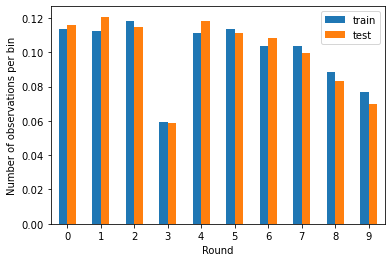

In [105]:
# Equal Frequency Discretization 

X_train8 = X_train.copy()
X_test8 = X_test.copy()
y_train8 = y_train.copy()
y_test8 = y_test.copy()

disc8 = EqualFrequencyDiscretiser(q=10, variables = disc[3], return_object = True)

disc8.fit(X_train8)

X_train8 = disc8.transform(X_train8)
X_test8 = disc8.transform(X_test8)

t1 = X_train8.groupby(['Round'])['Round'].count() / len(X_train8)
t2 = X_test8.groupby(['Round'])['Round'].count() / len(X_test8)

# concatenate aggregated views
tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']

# plot
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train8, y_train8)

print('train_mse:', mean_squared_error(y_train8, model_linear_regression.predict(X_train8)), 
      '\n test_mse:', mean_squared_error(y_test8, model_linear_regression.predict(X_test8)))

print('train_r-sq:', r2_score(y_train8, model_linear_regression.predict(X_train8)), 
      '\n test_r-sq:', r2_score(y_test8, model_linear_regression.predict(X_test8)))

### _Final Variable Discretisation_

In [106]:
final_disc = disc
final_disc 

['points', 'laps', 'fastestLap', 'Round']

train_mse: 87821633.1588885 
 test_mse: 90609839.76985544
train_r-sq: 0.5747480290207441 
 test_r-sq: 0.5643147833808121


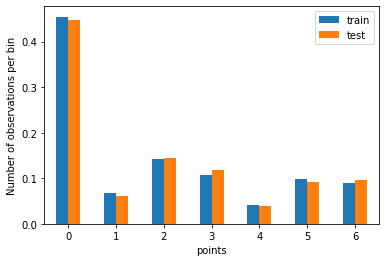

In [107]:
# Equal Frequency Discretization (POINTS)

disc1 = EqualFrequencyDiscretiser(q=10, variables = final_disc[0])

disc1.fit(X_train)

X_train = disc1.transform(X_train)
X_test = disc1.transform(X_test)

t1 = X_train.groupby(['points'])['points'].count() / len(X_train)
t2 = X_test.groupby(['points'])['points'].count() / len(X_test)

# concatenate aggregated views
tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']

# plot
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train, y_train)

print('train_mse:', mean_squared_error(y_train, model_linear_regression.predict(X_train)), 
      '\n test_mse:', mean_squared_error(y_test, model_linear_regression.predict(X_test)))

print('train_r-sq:', r2_score(y_train, model_linear_regression.predict(X_train)), 
      '\n test_r-sq:', r2_score(y_test, model_linear_regression.predict(X_test)))

train_mse: 87777871.54069711 
 test_mse: 90624912.96801546
train_r-sq: 0.5749599325543012 
 test_r-sq: 0.5642423059366165


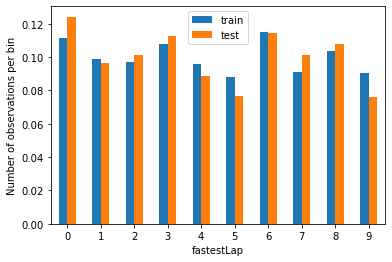

In [108]:
# Equal Frequency Discretization (FASTEST LAP)

disc3 = EqualFrequencyDiscretiser(q=10, variables = final_disc[2])

disc3.fit(X_train)

X_train = disc3.transform(X_train)
X_test = disc3.transform(X_test)

t1 = X_train.groupby(['fastestLap'])['fastestLap'].count() / len(X_train)
t2 = X_test.groupby(['fastestLap'])['fastestLap'].count() / len(X_test)

# concatenate aggregated views
tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']

# plot
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train, y_train)

print('train_mse:', mean_squared_error(y_train, model_linear_regression.predict(X_train)), 
      '\n test_mse:', mean_squared_error(y_test, model_linear_regression.predict(X_test)))

print('train_r-sq:', r2_score(y_train, model_linear_regression.predict(X_train)), 
      '\n test_r-sq:', r2_score(y_test, model_linear_regression.predict(X_test)))

train_mse: 87541333.4282966 
 test_mse: 90128406.34322609
train_r-sq: 0.5761053029475851 
 test_r-sq: 0.5666296912020983


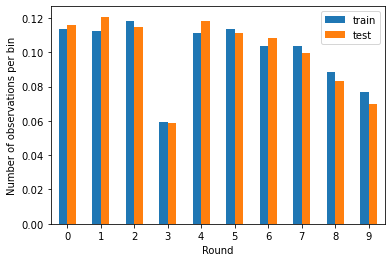

In [109]:
# Equal Frequency Discretization (ROUNDS)

disc4 = EqualFrequencyDiscretiser(q=10, variables = disc[3], return_object = True)

disc4.fit(X_train)

X_train = disc8.transform(X_train)
X_test = disc8.transform(X_test)

t1 = X_train.groupby(['Round'])['Round'].count() / len(X_train)
t2 = X_test.groupby(['Round'])['Round'].count() / len(X_test)

# concatenate aggregated views
tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']

# plot
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train, y_train)

print('train_mse:', mean_squared_error(y_train, model_linear_regression.predict(X_train)), 
      '\n test_mse:', mean_squared_error(y_test, model_linear_regression.predict(X_test)))

print('train_r-sq:', r2_score(y_train, model_linear_regression.predict(X_train)), 
      '\n test_r-sq:', r2_score(y_test, model_linear_regression.predict(X_test)))

## <u>3.7. Feature Scaling</u> <a id="part3.7"></a>

### _Standardisation_

In [110]:
X_train_feat1 = X_train.copy()
X_test_feat1 = X_test.copy()
y_train_feat1 = y_train.copy()
y_test_feat1 = y_test.copy()

scaler = StandardScaler()

scaler.fit(X_train_feat1)

X_train_feat1 = scaler.transform(X_train_feat1)
X_test_feat1 = scaler.transform(X_test_feat1)

In [111]:
scaler.mean_

array([1.86768764e+00, 5.74599890e+01, 4.41169978e+00, 4.28118102e+00,
       1.97336990e+03, 2.31663907e+00, 5.74103201e+00, 1.67512417e+01,
       2.71081678e+00, 7.08747241e+00, 1.62480684e+01, 6.55905077e-01,
       5.93267108e-03, 5.51876380e-03, 3.97350993e-02, 1.33830022e-02,
       1.67494481e-01, 6.62251656e-03, 4.00110375e-03, 9.10596026e-03,
       4.13907285e-04, 7.45033113e-03, 1.13134658e-02, 5.38079470e-03,
       1.37969095e-04, 1.37969095e-03, 2.48344371e-03, 2.20750552e-03,
       1.40728477e-02, 1.37969095e-03, 4.13907285e-04, 1.39348786e-02,
       1.51766004e-03, 4.13907285e-04, 4.13907285e-04, 4.13907285e-04,
       1.37969095e-04, 6.89845475e-04, 2.48344371e-03, 1.65562914e-03,
       1.79359823e-03, 8.27814570e-04, 2.75938190e-04, 1.37969095e-04,
       2.20750552e-03, 8.27814570e-04, 8.27814570e-04, 2.20750552e-03,
       1.37969095e-04, 4.13907285e-04, 6.89845475e-04, 8.27814570e-04,
       2.06953642e-03, 1.37969095e-04, 6.89845475e-04, 2.75938190e-04,
      

In [112]:
X_train_feat1 = pd.DataFrame(X_train_feat1, columns=X_train.columns)
X_test_feat1 = pd.DataFrame(X_test_feat1, columns=X_test.columns)

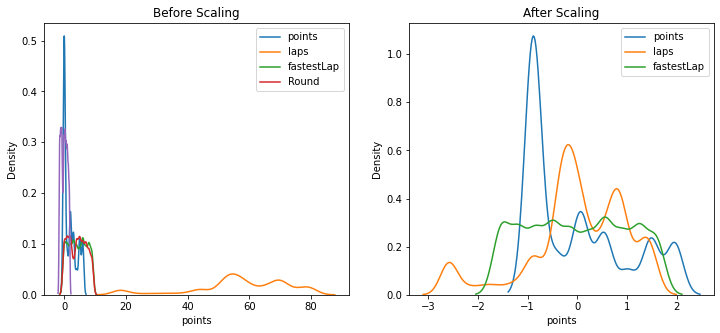

In [113]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['points'], ax=ax1, label ='points')
sns.kdeplot(X_train['laps'], ax=ax1, label ='laps')
sns.kdeplot(X_train['fastestLap'], ax=ax1, label ='fastestLap')
sns.kdeplot(X_train['Round'], ax=ax1, label ='Round')
ax1.legend()

# After scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_feat1['points'], ax=ax2, label ='points')
sns.kdeplot(X_train_feat1['laps'], ax=ax2, label ='laps')
sns.kdeplot(X_train_feat1['fastestLap'], ax=ax2, label ='fastestLap')
sns.kdeplot(X_train_feat1['Round'], ax=ax1, label ='Round')
ax2.legend()
plt.show()

In [114]:
model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train_feat1, y_train_feat1)

print('train_mse:', mean_squared_error(y_train_feat1, model_linear_regression.predict(X_train_feat1)), 
      '\n test_mse:', mean_squared_error(y_test_feat1, model_linear_regression.predict(X_test_feat1)))

print('train_r-sq:', r2_score(y_train_feat1, model_linear_regression.predict(X_train_feat1)), 
      '\n test_r-sq:', r2_score(y_test_feat1, model_linear_regression.predict(X_test_feat1)))

train_mse: 87541333.42829661 
 test_mse: 90128406.34322637
train_r-sq: 0.5761053029475851 
 test_r-sq: 0.5666296912020969


### _Mean Normalisation_

In [115]:
means = X_train.mean(axis=0)

In [116]:
ranges = X_train.max(axis=0)-X_train.min(axis=0)

In [117]:
X_train_feat2 = (X_train - means) / ranges

# Calculate mean normalization for X_test
X_test_feat2 = (X_test - means) / ranges

y_train_feat2 = y_train.copy()
y_test_feat2 = y_test.copy()

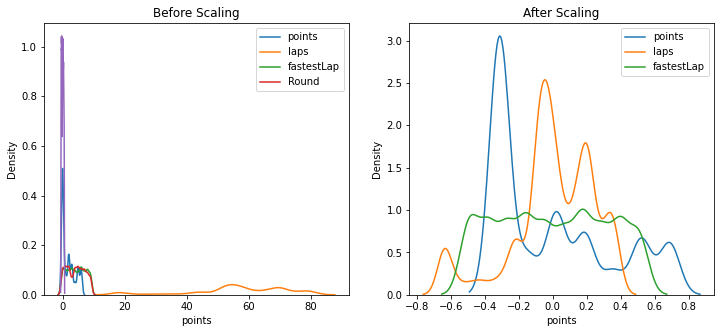

In [118]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['points'], ax=ax1, label ='points')
sns.kdeplot(X_train['laps'], ax=ax1, label ='laps')
sns.kdeplot(X_train['fastestLap'], ax=ax1, label ='fastestLap')
sns.kdeplot(X_train['Round'], ax=ax1, label ='Round')
ax1.legend()

# After scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_feat2['points'], ax=ax2, label ='points')
sns.kdeplot(X_train_feat2['laps'], ax=ax2, label ='laps')
sns.kdeplot(X_train_feat2['fastestLap'], ax=ax2, label ='fastestLap')
sns.kdeplot(X_train_feat2['Round'], ax=ax1, label ='Round')
ax2.legend()
plt.show()

In [119]:
model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train_feat2, y_train_feat2)

print('train_mse:', mean_squared_error(y_train_feat2, model_linear_regression.predict(X_train_feat2)), 
      '\n test_mse:', mean_squared_error(y_test_feat2, model_linear_regression.predict(X_test_feat2)))

print('train_r-sq:', r2_score(y_train_feat2, model_linear_regression.predict(X_train_feat2)), 
      '\n test_r-sq:', r2_score(y_test_feat2, model_linear_regression.predict(X_test_feat2)))

train_mse: 87541333.42829663 
 test_mse: 90128406.34322618
train_r-sq: 0.576105302947585 
 test_r-sq: 0.5666296912020978


### _MinMaxScaling_

In [120]:
X_train_feat3 = X_train.copy()
X_test_feat3 = X_test.copy()
y_train_feat3 = y_train.copy()
y_test_feat3 = y_test.copy()

scaler3 = MinMaxScaler()

scaler3.fit(X_train_feat3)

X_train_feat3 = scaler3.transform(X_train_feat3)
X_test_feat3 = scaler3.transform(X_test_feat3)

In [121]:
X_train_feat3 = pd.DataFrame(X_train_feat3, columns=X_train.columns)
X_test_feat3 = pd.DataFrame(X_test_feat3, columns=X_test.columns)

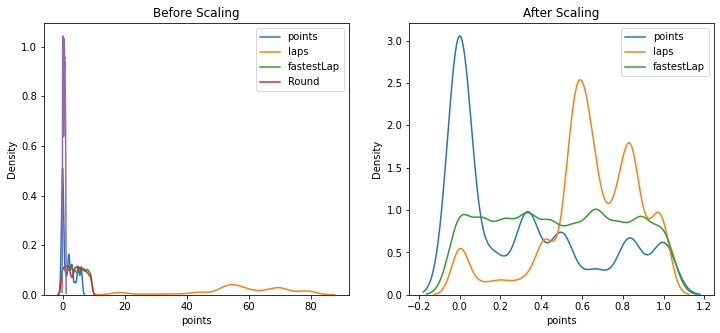

In [122]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['points'], ax=ax1, label ='points')
sns.kdeplot(X_train['laps'], ax=ax1, label ='laps')
sns.kdeplot(X_train['fastestLap'], ax=ax1, label ='fastestLap')
sns.kdeplot(X_train['Round'], ax=ax1, label ='Round')
ax1.legend()

# After scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_feat3['points'], ax=ax2, label ='points')
sns.kdeplot(X_train_feat3['laps'], ax=ax2, label ='laps')
sns.kdeplot(X_train_feat3['fastestLap'], ax=ax2, label ='fastestLap')
sns.kdeplot(X_train_feat3['Round'], ax=ax1, label ='Round')
ax2.legend()
plt.show()

In [123]:
model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train_feat3, y_train_feat3)

print('train_mse:', mean_squared_error(y_train_feat3, model_linear_regression.predict(X_train_feat3)), 
      '\n test_mse:', mean_squared_error(y_test_feat3, model_linear_regression.predict(X_test_feat3)))

print('train_r-sq:', r2_score(y_train_feat3, model_linear_regression.predict(X_train_feat3)), 
      '\n test_r-sq:', r2_score(y_test_feat3, model_linear_regression.predict(X_test_feat3)))

train_mse: 87541333.4282966 
 test_mse: 90128406.34322612
train_r-sq: 0.5761053029475851 
 test_r-sq: 0.5666296912020982


### _Maximum Absolute Scaling_

In [124]:
X_train_feat4 = X_train.copy()
X_test_feat4 = X_test.copy()
y_train_feat4 = y_train.copy()
y_test_feat4 = y_test.copy()

In [125]:
scaler4 = MaxAbsScaler()

scaler4.fit(X_train_feat4)

X_train_feat4 = scaler4.transform(X_train_feat4)
X_test_feat4 = scaler4.transform(X_test_feat4)

In [126]:
X_train_feat4 = pd.DataFrame(X_train_feat4, columns=X_train.columns)
X_test_feat4 = pd.DataFrame(X_test_feat4, columns=X_test.columns)

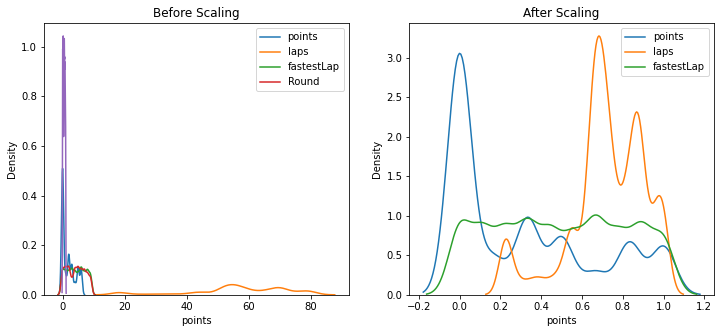

In [127]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['points'], ax=ax1, label ='points')
sns.kdeplot(X_train['laps'], ax=ax1, label ='laps')
sns.kdeplot(X_train['fastestLap'], ax=ax1, label ='fastestLap')
sns.kdeplot(X_train['Round'], ax=ax1, label ='Round')
ax1.legend()

# After scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_feat4['points'], ax=ax2, label ='points')
sns.kdeplot(X_train_feat4['laps'], ax=ax2, label ='laps')
sns.kdeplot(X_train_feat4['fastestLap'], ax=ax2, label ='fastestLap')
sns.kdeplot(X_train_feat4['Round'], ax=ax1, label ='Round')
ax2.legend()
plt.show()

In [128]:
model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train_feat4, y_train_feat4)

print('train_mse:', mean_squared_error(y_train_feat4, model_linear_regression.predict(X_train_feat4)), 
      '\n test_mse:', mean_squared_error(y_test_feat4, model_linear_regression.predict(X_test_feat4)))

print('train_r-sq:', r2_score(y_train_feat4, model_linear_regression.predict(X_train_feat4)), 
      '\n test_r-sq:', r2_score(y_test_feat4, model_linear_regression.predict(X_test_feat4)))

train_mse: 87541333.42829663 
 test_mse: 90128406.34322628
train_r-sq: 0.576105302947585 
 test_r-sq: 0.5666296912020974


### _Robust Scaling_

In [129]:
X_train_feat5 = X_train.copy()
X_test_feat5 = X_test.copy()
y_train_feat5 = y_train.copy()
y_test_feat5 = y_test.copy()

In [130]:
scaler5 = RobustScaler()

scaler5.fit(X_train_feat5)

X_train_feat5 = scaler5.transform(X_train_feat5)
X_test_feat5 = scaler5.transform(X_test_feat5)

In [131]:
X_train_feat5 = pd.DataFrame(X_train_feat5, columns=X_train.columns)
X_test_feat5 = pd.DataFrame(X_test_feat5, columns=X_test.columns)

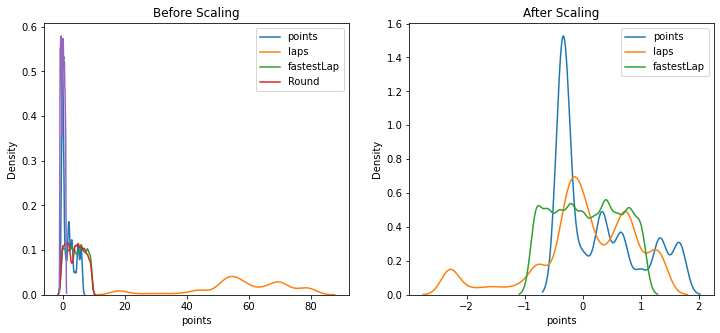

In [132]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['points'], ax=ax1, label ='points')
sns.kdeplot(X_train['laps'], ax=ax1, label ='laps')
sns.kdeplot(X_train['fastestLap'], ax=ax1, label ='fastestLap')
sns.kdeplot(X_train['Round'], ax=ax1, label ='Round')
ax1.legend()

# After scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_feat5['points'], ax=ax2, label ='points')
sns.kdeplot(X_train_feat5['laps'], ax=ax2, label ='laps')
sns.kdeplot(X_train_feat5['fastestLap'], ax=ax2, label ='fastestLap')
sns.kdeplot(X_train_feat5['Round'], ax=ax1, label ='Round')
ax2.legend()
plt.show()

In [133]:
model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train_feat5, y_train_feat5)

print('train_mse:', mean_squared_error(y_train_feat5, model_linear_regression.predict(X_train_feat5)), 
      '\n test_mse:', mean_squared_error(y_test_feat5, model_linear_regression.predict(X_test_feat5)))

print('train_r-sq:', r2_score(y_train_feat5, model_linear_regression.predict(X_train_feat5)), 
      '\n test_r-sq:', r2_score(y_test_feat5, model_linear_regression.predict(X_test_feat5)))

train_mse: 87541333.42829661 
 test_mse: 90128406.34322616
train_r-sq: 0.5761053029475851 
 test_r-sq: 0.5666296912020979


### _Final Feature Scaling Method_

In [134]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=X_train.columns)
X_test = pd.DataFrame(X_test, columns=X_test.columns)

In [135]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [136]:
model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train_scaled, y_train)

print('train_mse:', mean_squared_error(y_train, model_linear_regression.predict(X_train_scaled)), 
      '\n test_mse:', mean_squared_error(y_test, model_linear_regression.predict(X_test_scaled)))

print('train_r-sq:', r2_score(y_train, model_linear_regression.predict(X_train_scaled)), 
      '\n test_r-sq:', r2_score(y_test, model_linear_regression.predict(X_test_scaled)))

train_mse: 87541333.42829661 
 test_mse: 90128406.34322637
train_r-sq: 0.5761053029475851 
 test_r-sq: 0.5666296912020969


## <u>3.8. Applying Mathematical Calculations To Features</u> <a id="part3.8"></a>

### _Polynomial Expansion_

In [137]:
tmp = X_train_scaled.copy()
try_poly = X_train_scaled.copy()
try_poly_test = X_test_scaled.copy()

tmp['Target'] = y_train.tolist()
tmp.head(10)

,points,laps,fastestLap,Round,DriverYearDOB,DriverQuarterDOB,DriverMonthDOB,DriverDayDOB,RaceDateQuarter,RaceDateMonth,RaceDateDay,status_Finished,status_Retired,status_Suspension,status_+2 Laps,...,ConstructorNationality_American,ConstructorNationality_British,ConstructorNationality_Indian,ConstructorNationality_French,ConstructorNationality_Malaysian,ConstructorNationality_Japanese,ConstructorNationality_Russian,ConstructorNationality_German,ConstructorNationality_Austrian,ConstructorNationality_Dutch,ConstructorNationality_Swiss,ConstructorNationality_Spanish,ConstructorNationality_Irish,ConstructorNationality_Canadian,Target
0,0.536066,1.479352,0.899271,-1.506795,-2.513815,0.645455,0.382072,1.239870,-1.942204,-2.470964,0.302823,0.724300,-0.077253,-0.074494,-0.203419,...,-0.194042,-0.747469,-0.204886,-0.272206,-0.130845,-0.193275,-0.117074,-0.263329,-0.247701,-0.066593,-0.250202,-0.105644,-0.126973,-0.038987,104705.000000
1,-0.884211,-2.524216,-1.185351,-1.154837,0.337592,0.645455,0.685552,-1.185033,-0.806955,-0.847325,-0.357418,-1.380643,12.944425,-0.074494,-0.203419,...,-0.194042,-0.747469,-0.204886,-0.272206,-0.130845,-0.193275,-0.117074,-0.263329,-0.247701,-0.066593,-0.250202,-0.105644,-0.126973,-0.038987,85200.000000
2,-0.884211,-0.752145,0.204397,-1.506795,0.948607,1.589985,1.292512,-1.295255,-1.942204,-1.659145,1.073103,-1.380643,-0.077253,13.423859,-0.203419,...,5.153536,-0.747469,-0.204886,-0.272206,-0.130845,-0.193275,-0.117074,-0.263329,-0.247701,-0.066593,-0.250202,-0.105644,-0.126973,-0.038987,87600.000000
3,0.062640,0.888661,-0.490477,-1.506795,-0.680768,-1.243605,-0.831849,0.468310,-1.942204,-1.659145,0.963063,0.724300,-0.077253,-0.074494,-0.203419,...,-0.194042,1.337848,-0.204886,-0.272206,-0.130845,-0.193275,-0.117074,-0.263329,-0.247701,-0.066593,-0.250202,-0.105644,-0.126973,-0.038987,82802.535211
4,1.009491,-0.292719,0.899271,0.604952,1.152279,0.645455,0.989032,0.027419,0.328295,0.776314,-1.457819,0.724300,-0.077253,-0.074494,-0.203419,...,-0.194042,-0.747469,4.880770,-0.272206,-0.130845,-0.193275,-0.117074,-0.263329,-0.247701,-0.066593,-0.250202,-0.105644,-0.126973,-0.038987,85100.000000
5,-0.884211,0.691765,1.594146,0.252994,0.490345,-1.243605,-1.438809,-0.633918,0.328295,-0.035506,1.623304,-1.380643,-0.077253,-0.074494,4.915960,...,-0.194042,-0.747469,4.880770,-0.272206,-0.130845,-0.193275,-0.117074,-0.263329,-0.247701,-0.066593,-0.250202,-0.105644,-0.126973,-0.038987,85600.000000
6,-0.884211,-1.736629,-0.837914,-1.154837,0.795853,0.645455,0.382072,-1.736147,-0.806955,-1.253235,1.293184,-1.380643,-0.077253,-0.074494,-0.203419,...,-0.194042,-0.747469,-0.204886,3.673690,-0.130845,-0.193275,-0.117074,-0.263329,-0.247701,-0.066593,-0.250202,-0.105644,-0.126973,-0.038987,106800.000000
7,1.956343,-0.030190,0.204397,-0.098964,0.286674,1.589985,1.292512,0.027419,-0.806955,-0.441416,0.853023,0.724300,-0.077253,-0.074494,-0.203419,...,-0.194042,1.337848,-0.204886,-0.272206,-0.130845,-0.193275,-0.117074,-0.263329,-0.247701,-0.066593,-0.250202,-0.105644,-0.126973,-0.038987,103700.000000
8,0.536066,-0.292719,-0.490477,0.252994,-1.291784,0.645455,0.382072,-1.405478,0.328295,0.370404,-0.247378,0.724300,-0.077253,-0.074494,-0.203419,...,-0.194042,-0.747469,-0.204886,-0.272206,-0.130845,-0.193275,-0.117074,-0.263329,-0.247701,-0.066593,-0.250202,-0.105644,-0.126973,-0.038987,95841.132075
9,0.536066,-1.408467,-1.185351,-1.154837,-3.277585,-0.299075,-0.224888,-0.082804,-0.806955,-0.441416,0.522903,0.724300,-0.077253,-0.074494,-0.203419,...,-0.194042,-0.747469,-0.204886,-0.272206,-0.130845,-0.193275,-0.117074,-0.263329,-0.247701,-0.066593,-0.250202,-0.105644,-0.126973,-0.038987,128473.636364


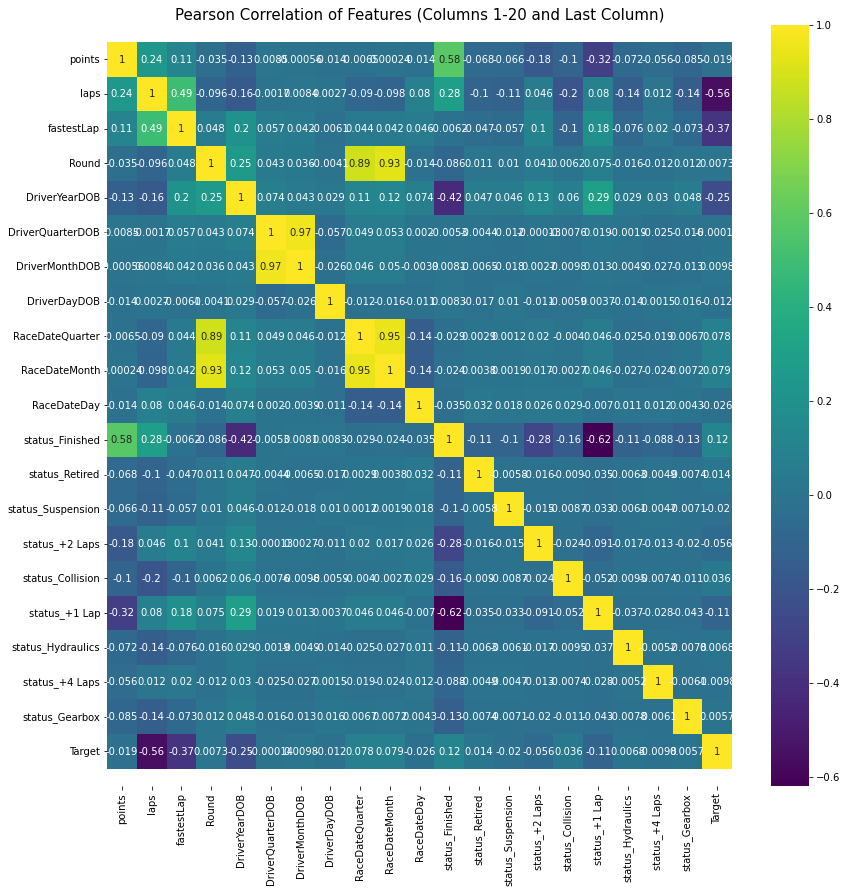

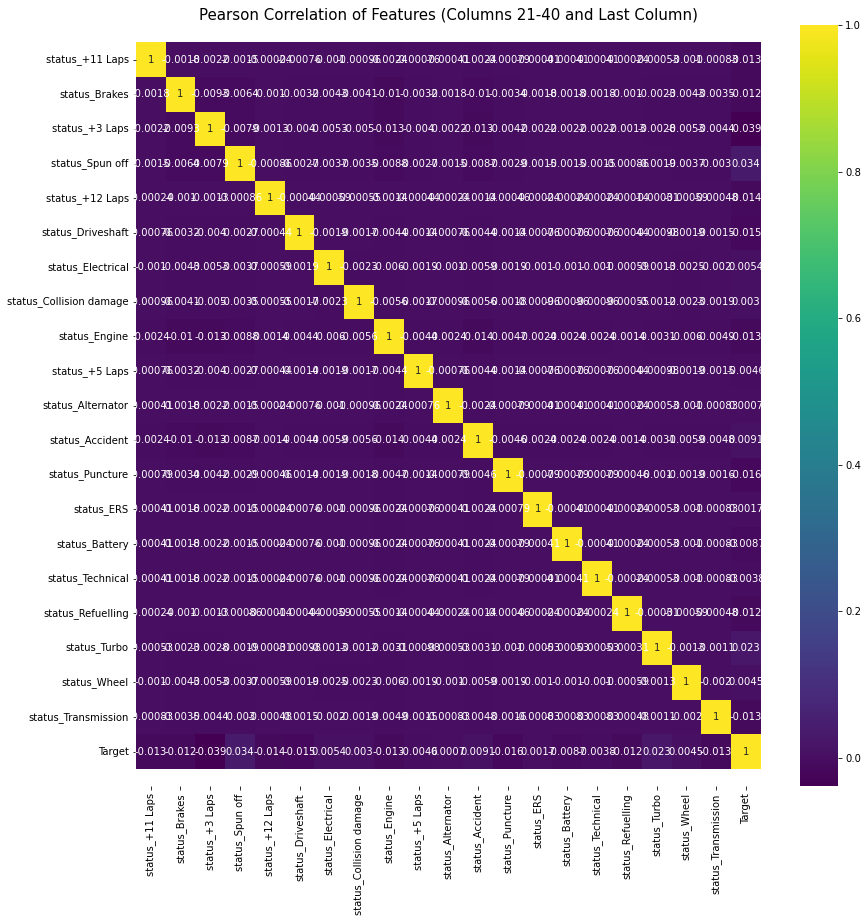

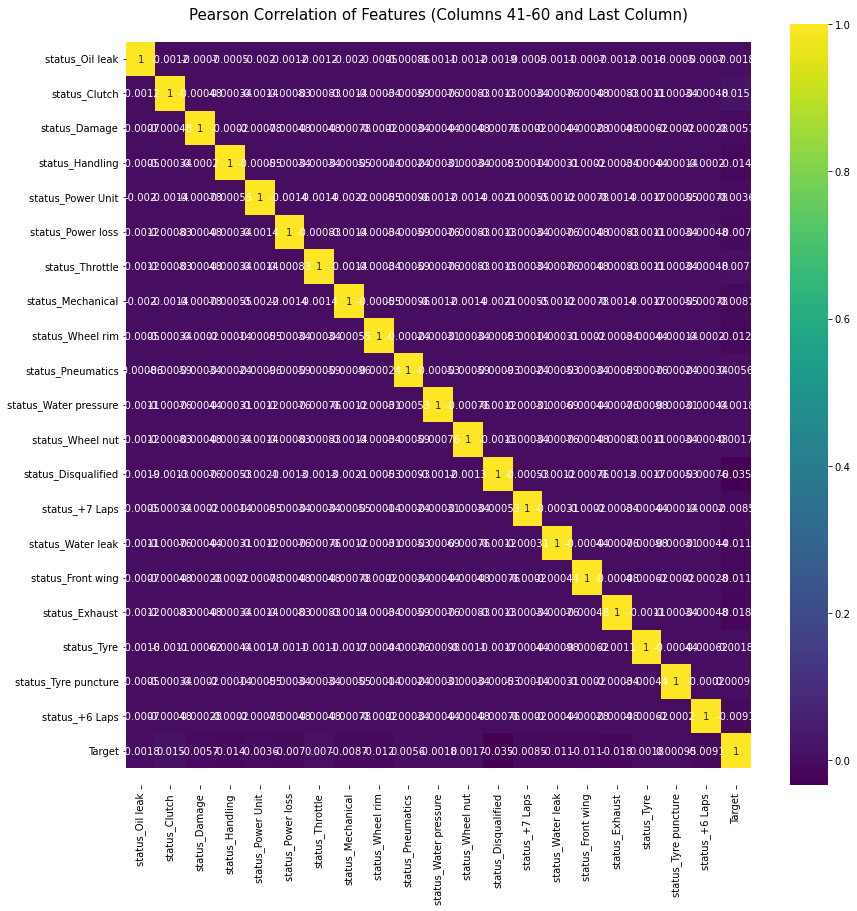

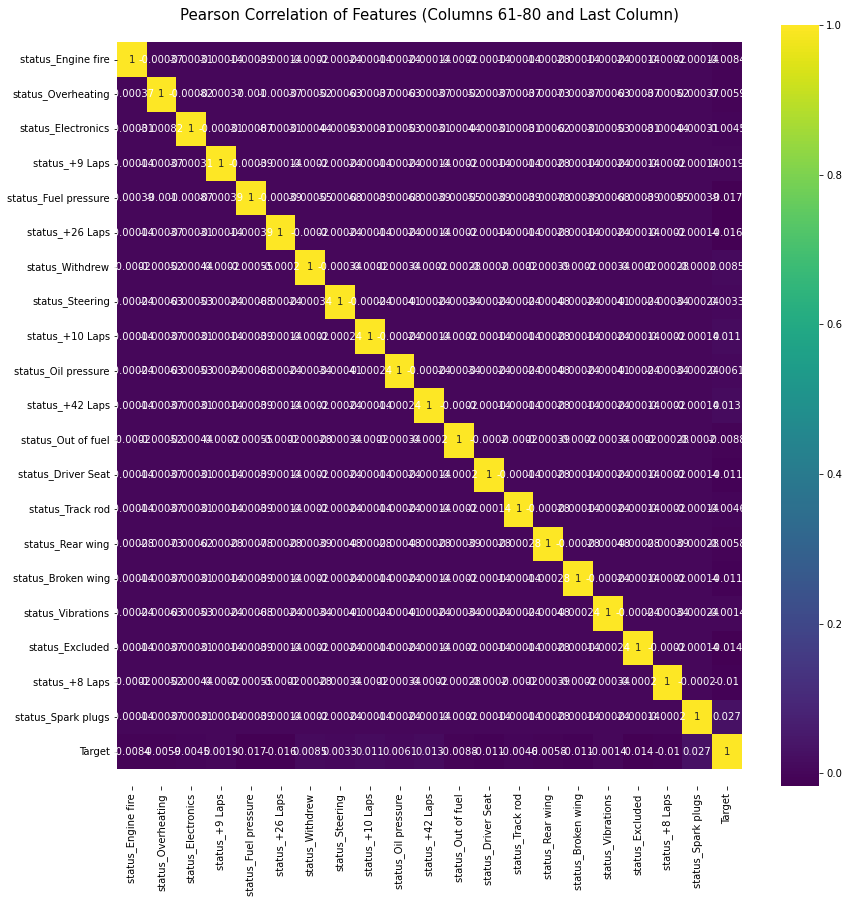

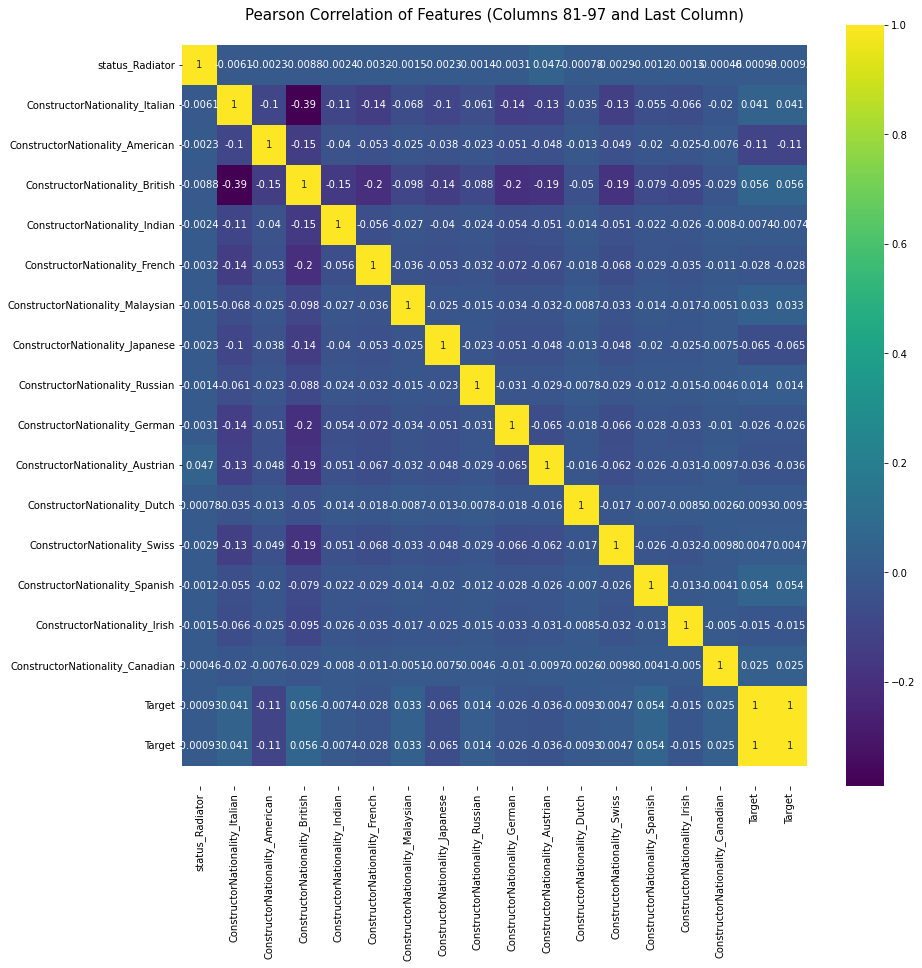

In [138]:
num_columns = tmp.shape[1]  # Total number of columns
chunk_size = 20  # Number of columns to display in each heatmap
last_column_index = num_columns - 1  # Index of the last column

# Loop through chunks of columns
for start_index in range(0, num_columns, chunk_size):
    end_index = min(start_index + chunk_size, num_columns)
    
    # Select the columns
    selected_columns = tmp.iloc[:, start_index:end_index]
    
    # Extract the last column (target variable)
    last_column = tmp.iloc[:, last_column_index]
    
    # Concatenate the selected columns and the last column
    combined_columns = pd.concat([selected_columns, last_column], axis=1)
    
    # Create a heatmap
    colormap = plt.cm.viridis
    plt.figure(figsize=(14, 14))
    plt.title(f'Pearson Correlation of Features (Columns {start_index+1}-{end_index} and Last Column)', size=15)
    ax = sns.heatmap(combined_columns.astype(float).corr(), cmap=colormap, annot=True)
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.show()

In [139]:
poly = PolynomialFeatures(degree=3, interaction_only=False, include_bias=False)

In [140]:
poly.fit(try_poly[['laps','fastestLap','DriverYearDOB','ConstructorNationality_American']])

PolynomialFeatures(degree=3, include_bias=False)

In [141]:
try_poly= poly.transform(try_poly[['laps','fastestLap','DriverYearDOB','ConstructorNationality_American']])

try_poly_test= poly.transform(try_poly_test[['laps','fastestLap','DriverYearDOB','ConstructorNationality_American']])

In [142]:
model_linear_regression = LinearRegression()
model_linear_regression.fit(try_poly, y_train)

print('train_mse:', mean_squared_error(y_train, model_linear_regression.predict(try_poly)), 
      '\n test_mse:', mean_squared_error(y_test, model_linear_regression.predict(try_poly_test)))

print('train_r-sq:', r2_score(y_train, model_linear_regression.predict(try_poly)), 
      '\n test_r-sq:', r2_score(y_test, model_linear_regression.predict(try_poly_test)))

train_mse: 83705659.33204675 
 test_mse: 85023185.98260319
train_r-sq: 0.5946784939802918 
 test_r-sq: 0.5911774560404007


### _Final Polynomial Expansion_

In [143]:
X_train = try_poly
X_test = try_poly_test

### _PCA_

In [144]:
X_train_PCA = X_train.copy()
X_test_PCA = X_test.copy()
y_train_PCA = y_train.copy()
y_test_PCA = y_test.copy()

In [145]:
# standardisation: with the StandardScaler from sklearn

# set up the scaler
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train_PCA)

# transform train and test sets
X_train_scaled = scaler.transform(X_train_PCA)
X_test_scaled = scaler.transform(X_test_PCA)

In [146]:
pca = PCA()

In [147]:
pca.fit(X_train_scaled)

PCA()

In [148]:
train_t = pca.transform(X_train_scaled)
test_t = pca.transform(X_test_scaled)

In [149]:
# show the variance explanation for each Principal Component
print(len(pca.explained_variance_ratio_))
print(pca.explained_variance_ratio_)

34
[3.00589092e-01 1.71787026e-01 1.10849944e-01 7.68752029e-02
 6.47734665e-02 6.03243440e-02 4.58972980e-02 4.03836988e-02
 3.18334879e-02 2.05508140e-02 1.19022750e-02 1.08424674e-02
 8.05814861e-03 7.26217066e-03 6.11331543e-03 5.24570423e-03
 4.45970607e-03 3.86589043e-03 3.65188474e-03 3.44446879e-03
 2.66307567e-03 2.51200550e-03 1.38451746e-03 1.24322786e-03
 1.06415977e-03 9.35043408e-04 6.65842537e-04 5.62566039e-04
 2.59156749e-04 1.12575873e-32 9.96672398e-33 9.45755802e-33
 2.22785001e-33 1.92968040e-33]


Text(0, 0.5, 'Percentage of Variance Explained')

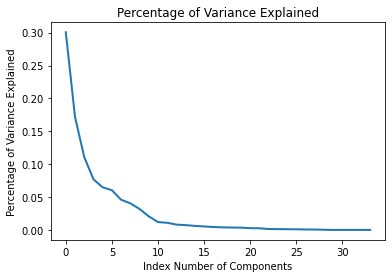

In [150]:
# determine the number of informative components

# the number of components is determined by the change
# in the decay in the percentage of variance explained
# by each component

plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.title('Percentage of Variance Explained')
plt.xlabel('Index Number of Components')
plt.ylabel('Percentage of Variance Explained')

In [151]:
model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train_scaled, y_train_PCA)

print('train_mse:', mean_squared_error(y_train_PCA, model_linear_regression.predict(X_train_scaled)), 
      '\n test_mse:', mean_squared_error(y_test_PCA, model_linear_regression.predict(X_test_scaled)))

print('train_r-sq:', r2_score(y_train_PCA, model_linear_regression.predict(X_train_scaled)), 
      '\n test_r-sq:', r2_score(y_test_PCA, model_linear_regression.predict(X_test_scaled)))

train_mse: 83706786.42943312 
 test_mse: 85023724.74802649
train_r-sq: 0.5946730363229038 
 test_r-sq: 0.5911748654593916


# Step 4: Machine Learning Modelling <a id="part4"></a>

**<u>Train Test Dimensionality</u>**

After performing Data Wrangling techniques to build a Linear Regression Model, the final X Train and X Test data presents a dimensionality of:

<u>_X Train_</u>

**Rows:** 7248       

**Columns:** 34

<u>_X Test_</u>

**Rows:** 3107       

**Columns:** 34

Overall, the dataset's dimensions  fulfils the requirements of ensureing non-trvial and realistic predictions, having 96 columns and over 10000 rows. The broad range of variables is valuable in enhancing the model's reliability, as it offers an advantage of a wider scope for pattern recognition and correlation detection between the variables and target. Moreover, with the diverse dimensions, it enhances the model to unravel intricate relationships, which may be unidentifiable in smaller datasets. Additionally, the model's ability to generalise the data is improved with the broad array of features, ensuring better performance on unseen data. Therefore, having a reliable dataset with realistic and dependable dimensions will enable the model to capture more patterns and deliver more dependable predictions.

**<u>Model Evaluation</u>**

In general, the naive baseline serves as the simplest model that forms predictions based on a constant value regardless of other variables, such as the mean of the target value. The comparison between the naive baseline and linear regression model performance allows us to estimate and determine how effective our linear regression model is, seeking ways to improve the model.

Comparing both **Mean Square Error (MSE) values**, we can observe an evident difference in the values, as shown from the Naive Baseline Model and Linear Regression Model MSE on the test data being approximately 200 million and 83 million respectively. This difference indicates that the Linear Regression model's predictions are much closer to the actual values, suggesting that it captures more meaningful patterns in the data. This shows that the Linear Regression model performs better than the naive baseline

The **Root Mean Squared Error (RMSE) values** further corroborates the better performance of the Linear Regression model, having a value of around 9100 and 9250 for the train and test data respectively, whereas the naive baseline performed much poorly, having a RSME of around 14000 for both train and test data. Hence, the smaller RMSE values of the Linear Regression model indicates that the model's predictions have significantly less deviation from the actual values compared to the naive baseline.

The **R-Squared (R2) values** represent the proportion of the varience that the model explains, in which a higher R2 value indicates higher accuracies in aligning the model's predictions and actual data points. In this case. the Linear Regression Model indicates an R2 value of approximately 0.5951 and 0.5918 for training and test data respectively, reflecting its ability to capture a significant portion of the variance. Whereas for the naive baseline, its R2 values of 0.00 indicates its failure to explain by variance, highlighting its limited predictive effectiveness. Hence, this shows that the linear regression model's predictive power reigns superior and better

Overall, the comparison results has proved the better performance the Linear Regression moel has showcased. Its ability to treduce MSE, RSME, and exhibit positive and greater R2 values manifests its potence to capture meaningful relationships within the data.

## <u>Final Dataset Overview</u>

### _X Train_

In [152]:
num_rows, num_columns = X_train.shape

print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 7248
Number of columns: 34


### _X Test_

In [153]:
num_rows, num_columns = X_test.shape

print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 3107
Number of columns: 34


## <u>Naive Baseline Model</u>

In [154]:
# pick the mean target value from all of train data
print(y_train.mean())

mean_target_value = y_train.mean()

print(f"The train mean target value is {mean_target_value:.2f}.")

93435.55421535167
The train mean target value is 93435.55.


In [155]:
y_train_preds_naive = [round(mean_target_value,2) for row in X_train_enc1.iloc[:,0]]
y_train_preds_naive[0:5]

[93435.55, 93435.55, 93435.55, 93435.55, 93435.55]

In [156]:
# insert code here
y_test_preds_naive = [round(mean_target_value,2) for row in X_test_enc1.iloc[:,0]]
y_test_preds_naive[0:5]

[93435.55, 93435.55, 93435.55, 93435.55, 93435.55]

In [157]:
# Mean Squared Error (the lower the better, 0 is best possible score)

# train MSE score
y_true = y_train
y_pred = y_train_preds_naive

train_mse_naive = mean_squared_error(y_true, y_pred)
print(f"The Naive Baseline Model's MSE on train data is {train_mse_naive:.2f}.")

# test MSE score
y_true = y_test
y_pred = y_test_preds_naive

test_mse_naive = mean_squared_error(y_true, y_pred)
print(f"The Naive Baseline Model's MSE on test data is {test_mse_naive:.2f}.")

print()

# Root Mean Squared Error (if MSE < 1, rooting it makes it numerically larger, vice-versa if MSE > 1)

# train RMSE score
y_true = y_train
y_pred = y_train_preds_naive

train_rmse_naive = mean_squared_error(y_true, y_pred, squared=False)
print(f"The Naive Baseline Model's RMSE on train data is {train_rmse_naive:.2f}.")

# test RMSE score
y_true = y_test
y_pred = y_test_preds_naive

test_rmse_naive = mean_squared_error(y_true, y_pred, squared=False)
print(f"The Naive Baseline Model's RMSE on test data is {test_rmse_naive:.2f}.")

print()

# R2 Value (Coefficient of Determination, which measures how well the X cols account for y's variance, 1.0 is best score)

# train R2 score
y_true = y_train
y_pred = y_train_preds_naive

train_r2_naive = r2_score(y_true, y_pred)
print(f"The Naive Baseline Model's R2 on train data is {train_r2_naive:.2f}.")

# test R2 score
y_true = y_test
y_pred = y_test_preds_naive

test_r2_naive = r2_score(y_true, y_pred)
print(f"The Naive Baseline Model's R2 on test data is {test_r2_naive:.2f}.")


The Naive Baseline Model's MSE on train data is 206516698.69.
The Naive Baseline Model's MSE on test data is 208039677.12.

The Naive Baseline Model's RMSE on train data is 14370.69.
The Naive Baseline Model's RMSE on test data is 14423.58.

The Naive Baseline Model's R2 on train data is -0.00.
The Naive Baseline Model's R2 on test data is -0.00.


## <u>Regression Model</u>

In [158]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression().fit(X_train, y_train)

In [159]:
y_train_preds_linreg = linreg.predict(X_train)
y_test_preds_linreg = linreg.predict(X_test)

In [160]:
# Mean Squared Error (the lower the better, 0 is best possible score)

# train MSE score
y_true = y_train
y_pred = y_train_preds_linreg

train_mse_linreg = mean_squared_error(y_true, y_pred)
print(f"The LinReg Model's MSE on train data is {train_mse_linreg:.4f}.")

# test MSE score
y_true = y_test
y_pred = y_test_preds_linreg

test_mse_linreg = mean_squared_error(y_true, y_pred)
print(f"The LinReg Model's MSE on test data is {test_mse_linreg:.4f}.")

print()

# Root Mean Squared Error (if MSE < 1, rooting it makes it numerically larger, vice-versa if MSE > 1)

# train RMSE score
y_true = y_train
y_pred = y_train_preds_linreg

train_rmse_linreg = mean_squared_error(y_true, y_pred, squared=False)
print(f"The LinReg Model's RMSE on train data is {train_rmse_linreg:.4f}.")

# test RMSE score
y_true = y_test
y_pred = y_test_preds_linreg

test_rmse_linreg = mean_squared_error(y_true, y_pred, squared=False)
print(f"The LinReg Model's RMSE on test data is {test_rmse_linreg:.4f}.")

print()

# R2 Value (Coefficient of Determination, which measures how well the X cols account for y's variance, 1.0 is best score)

# train R2 score
y_true = y_train
y_pred = y_train_preds_linreg

train_r2_linreg = r2_score(y_true, y_pred)
print(f"The LinReg Model's R2 on train data is {train_r2_linreg:.4f}.")

# test R2 score
y_true = y_test
y_pred = y_test_preds_linreg

test_r2_linreg = r2_score(y_true, y_pred)
print(f"The LinReg Model's R2 on test data is {test_r2_linreg:.4f}.")

The LinReg Model's MSE on train data is 83705659.3320.
The LinReg Model's MSE on test data is 85023185.9826.

The LinReg Model's RMSE on train data is 9149.0797.
The LinReg Model's RMSE on test data is 9220.8018.

The LinReg Model's R2 on train data is 0.5947.
The LinReg Model's R2 on test data is 0.5912.


# Step 5: Summary & Further Improvements <a id="part5"></a>

**<u>Summary of Findings</u>**

There are numerous insights that can be derived from the linear regression model created. Comparing the naive baseline and regression model, the regression model has not only provened to be more effective model in predicting our target variable, FastestLapTime, but also allowing us to identify certain attributes within the data that reflects moderately high correlatons with the target variable.

Variables such as Laps and Constructor Nationality has shown to be important variables in predicting the FastestLapTime, as shown from the correlation heatmaps plotted previously

After building and evaluating the model, with the linear regression model's moderate accurate prediction power approximating from 0.59 to 0.595, various F1 teams will have increasing awareness of the different features that have correlations with Fastest Lap Times. 

With the regression model, competing F1 teams who utilise this model will be able to identify certain specific information that affect their race peformances, including particular Constructor Nationalities they are under, or their driver's Year of Birth. For example, the correlation heatmap showcases a moderate correlation between the Driver's Year of Birth and Fastest Lap Time.

Hence, the F1 team can make use of the model to perform predictions on their fastest lap time during upcoming races, and the F1 teams will be able to strategically optimise their resource planning, conduct adjustments to their vehicles, and make careful decisions on replacing drivers based on their performance to achieve the best possible fastest lap time. 

Ultimately, by doing so, this would potentially giving the competing F1 teams a competitive edge in future races through these optimisations and adjustments based on the model's predictions, increasing the probability of clinching victory.
  
**<u>Further Improvements</u>**

There were many stages that can be potentially improved throughout the modelling process.

Firstly, throughout the entire modelling process, I had many features included in my train and test data at the end, having a total of 700 columns. However, due to the curse of dimensionality, the results shown for the various tests were not pleasing. 

Hence, removing these features allowed the model's performance results to improve significantly. Therefore, there was a sign of major improvement, such as spending more time to perform aggregation on some variables to reduce cardinality. Adding more features paramount in data modelling as it uncovers new patterns and correlations between the target and other variables, improving the model's predictive power. Hence, I could have spent more time on making use of aggregations to reduce some of the variables' cardinality, instead of removing the column entirely. 

On the topic of features, I felt that more features could have been added during the Data Wrangling on Multiple Tables stage. Being able to create more new features would increase the dimensionality of the data, however, it opens up doors to new emerging and undiscovered patterns between these newly created features and the target variable. Hence, I would have intended to spend more time during the Creation of Features process that could have potentially improved my model's performance by a wider margin

Conclusively, with these possible improvements, the model performance would exhibit better predictive power and results